# AWS Billing Report 

https://d-906760626e.awsapps.com/start


In [3]:
import boto3
from datetime import date
from dateutil.relativedelta import relativedelta
import seaborn as sns
import pandas as pd
import subprocess
from time import time, sleep
import webbrowser
from boto3.session import Session
import matplotlib.pyplot as plt


https://stackoverflow.com/questions/62311866/how-to-use-the-aws-python-sdk-while-connecting-via-sso-credentials

In [2]:
# if your sso is setup in a different region, you will
# want to include region_name=sso_region in the 
# session constructor below

def AWS_SSO_Login():
    session = Session()
    start_url = 'https://d-906760626e.awsapps.com/start'
    region = 'us-east-1' 
    sso_oidc = session.client('sso-oidc',region_name=region)
    client_creds = sso_oidc.register_client(
        clientName='myapp',
        clientType='public',
    )
    device_authorization = sso_oidc.start_device_authorization(
        clientId=client_creds['clientId'],
        clientSecret=client_creds['clientSecret'],
        startUrl=start_url,
    )
    url = device_authorization['verificationUriComplete']
    device_code = device_authorization['deviceCode']
    expires_in = device_authorization['expiresIn']
    interval = device_authorization['interval']
    webbrowser.open(url, autoraise=True)
    for n in range(1, expires_in // interval + 1):
        sleep(interval)
        try:
            token = sso_oidc.create_token(
                grantType='urn:ietf:params:oauth:grant-type:device_code',
                deviceCode=device_code,
                clientId=client_creds['clientId'],
                clientSecret=client_creds['clientSecret'],
            )
            return_code = True
            break
        except sso_oidc.exceptions.AuthorizationPendingException:
            return_code = False
            pass
    return return_code,session,token

In [5]:
def Get_AWS_Account_Keys(session, token, account_no):
    region = 'us-east-1'
    account_id = account_no
    access_token = token['accessToken']
    sso = session.client('sso',region_name=region)
    account_roles = sso.list_account_roles(
        accessToken=access_token,
        accountId=account_id,
    )
    #print(account_roles)
    roles = account_roles['roleList'] # 'roleList'
    # simplifying here for illustrative purposes
    role = roles[0]
    #-------------
    #print(role)
    #-------------
    # earlier versions of the sso api returned the 
    # role credentials directly, but now they appear
    # to be in a subkey called `roleCredentials`
    if role['roleName'] == 'MarketplaceRead':
        role['roleName'] = 'BillingReadOnly'

    role_creds = sso.get_role_credentials(
        roleName=role['roleName'],
        #roleName='ReadOnly',
        accountId=account_id,
        accessToken=access_token,
    )['roleCredentials']
    #print(role_creds)
    session = Session(
        region_name=region,
        aws_access_key_id=role_creds['accessKeyId'],
        aws_secret_access_key=role_creds['secretAccessKey'],
        aws_session_token=role_creds['sessionToken'],
    )
    #-------------
    #print(role)
    #-------------
    return role_creds

# Accounts in AWS

## Enviroment values: production, development, sandbox, share services, non-prod

In [438]:
aws_name_accounts = []
# ======== >>>  Amperwave accounts <<< =========
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------


In [6]:
aws_name_accounts = []
#-----------------------------------------------
aws_account_name = 'Entercom Communications'
aws_account = '724972922289'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes This is the MAIN Account
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------a2 prod --------------
'''
aws_account_name = 'Aardvark2-Prod A2'
aws_account = '910555647794'
aws_enviroment = 'production'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#--------------------------------Data Tean ---------------
aws_account_name = 'AdvancedAudio Data Team'
aws_account = '900072481376'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'no' # no access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------A1 -----------------
aws_account_name = 'cobradev A1'
aws_account = '094289890028'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no accdsz in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------AW ??? ----------------
aws_account_name = 'Core Dev A1 or AW'
aws_account = '110926662372'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no Access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------A1 --------------
aws_account_name = 'cobraprod A1'
aws_account = '094289890028 '
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # This account canot be accces by code
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A1----------------
aws_account_name = 'Entercom A1'
aws_account = '787242951186'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS 
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#----------------------------------A1-------------
aws_account_name = 'Entercom Production A1'
aws_account = '477779916141'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- ?? ----------------
aws_account_name = 'Metadata Dev'
aws_account = '406307397670'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------ROC-----------------
aws_account_name = 'OpsConsole-NonProd ROC'
aws_account = '659560379904'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A2----------------
aws_account_name = 'Personalization A2'
aws_account = '354704368578'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no acess to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- A2 ??? ----------------
aws_account_name = 'PubCMSDev A2'
aws_account = '643170364694'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Shared_Services'
aws_account = '477185329132'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------- ?? -------------------
aws_account_name = 'uap-sandbox'
aws_account = '372074449155'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Unity Dev'
aws_account = '077691119997'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'UserTokenSandbox'
aws_account = '967638613557'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
'''

"\naws_account_name = 'Aardvark2-Prod A2'\naws_account = '910555647794'\naws_enviroment = 'production'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#--------------------------------Data Tean ---------------\naws_account_name = 'AdvancedAudio Data Team'\naws_account = '900072481376'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'no' # no access in AWS\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave_Prod'\naws_account = '847645690781'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave-No

In [7]:
for name_account in aws_name_accounts:
    print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Active Accoutns:

In [8]:
for name_account in aws_name_accounts:
    if name_account[4] == 'yes':
        print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Potential accounts that can be deleted...

In [9]:
for name_account in aws_name_accounts:
    if name_account[4] == 'no':
        print(name_account)

# Access AWS and get the Keys

In [10]:
aws_profiles = []
return_code, session,token = AWS_SSO_Login()
if return_code:
    for name_account in aws_name_accounts:
        if name_account[4] == 'yes':
            print("Getting keys for: " + name_account[0])
            aws_account_name = name_account[0]
            aws_account = name_account[1]
            role_creds = Get_AWS_Account_Keys(session, token, aws_account)
            aws_access_key_id = role_creds['accessKeyId']
            aws_secret_access_key = role_creds['secretAccessKey']
            aws_session_token = role_creds['sessionToken']
            aws_keys = {'name':aws_account_name, 'account': aws_account, 'key':aws_access_key_id, 'access':aws_secret_access_key, 'token':aws_session_token}
            aws_profiles.append(aws_keys)
else:
    print("Unable to Login in AWS SSO")


Getting keys for: Entercom Communications


In [11]:
for profiles in aws_profiles:
    print(profiles['name'])

Entercom Communications


# Get the correct Dates

In [12]:
# Find the start and end dates for last month
today = date.today()
first_day_of_previous_month = (today.replace(day=1) - relativedelta(months=1)).replace(day=1)
last_day_of_previous_month = today.replace(day=1) - relativedelta(days=1)
reportMonth = (today - relativedelta(months=1)).strftime("%b").upper()
reportYear= str(today.year)
#month_name = today.strftime("%b")

In [13]:
reportStart = first_day_of_previous_month.strftime('%Y-%m-%d')
reportEnd = last_day_of_previous_month.strftime('%Y-%m-%d')

## If you waant to set it up Manually:

In [14]:
reportStart = '2025-02-01'
reportEnd = '2025-03-01'
reportYear = '2025'
reportMonth = 'FEB'

In [15]:
print("From: " + reportStart + " To: " + reportEnd)
print('Month: ' + reportMonth)
print('Year: ' + reportYear)

From: 2025-02-01 To: 2025-03-01
Month: FEB
Year: 2025


# Playing wiht Tags.....

In [870]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    #response_tag1 = cost_explorer_client.get_tags(Arn='arn:aws:sts::724972922289:assumed-role/AWSBillingReadOnlyAccess_9298a8a5bf35e9c4/jorge.rodriguez@audacy.com')

    response_tag = cost_explorer_client.get_tags(
        SearchString='',
        TimePeriod=time_period, 
        TagKey='Dev'
        #SortBy=[
        #{
        #    'Key': 'NET_UNBLENDED_COST',
        #    'SortOrder': 'ASCENDING'
        #},]
    )
    
    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount)

            })

df = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [871]:
response_tag['Tags']

['']

In [874]:
response.keys()

dict_keys(['GroupDefinitions', 'ResultsByTime', 'DimensionValueAttributes', 'ResponseMetadata'])

# Getting the Billing Information

In [16]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount),
                'Enviroment': group['Keys'][1]
            })

df = pd.DataFrame(data)
#df_AW = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [15]:
#df_both = pd.concat([df,df_AW], axis=0, ignore_index=True)

In [17]:
df['Enviroment'].unique()

array(['Environment$', 'Environment$prod', 'Environment$nonprod',
       'Environment$Production', 'Environment$dev',
       'Environment$loadtest', 'Environment$sandbox',
       'Environment$shared', 'Environment$stg',
       'Environment$aardvark-prd', 'Environment$prd', 'Environment$sbx',
       'Environment$qa', 'Environment$common', 'Environment$global',
       'Environment$PSFalcon', 'Environment$development',
       'Environment$management', 'Environment$Dev/Test',
       'Environment$production', 'Environment$Dev', 'Environment$test',
       'Environment$Common', 'Environment$Sandbox', 'Environment$POC',
       'Environment$ops'], dtype=object)

In [18]:
df.shape

(208, 7)

In [19]:
df.sample(10)

,Month,Year,Name,Account,Service,Cost,Enviroment
62,FEB,2025,Entercom Communications,724972922289,Amazon DevOps Guru,0.000000,Environment$
13,FEB,2025,Entercom Communications,724972922289,AWS Directory Service,248.659175,Environment$
177,FEB,2025,Entercom Communications,724972922289,Amazon Simple Storage Service,5.004221,Environment$Production
22,FEB,2025,Entercom Communications,724972922289,AWS Key Management Service,0.507528,Environment$dev
46,FEB,2025,Entercom Communications,724972922289,AWS Systems Manager,0.071280,Environment$
12,FEB,2025,Entercom Communications,724972922289,AWS Database Migration Service,118.378594,Environment$nonprod
123,FEB,2025,Entercom Communications,724972922289,Amazon Lightsail,4.694683,Environment$
149,FEB,2025,Entercom Communications,724972922289,Amazon Relational Database Service,7772.501424,Environment$prod
119,FEB,2025,Entercom Communications,724972922289,Amazon GuardDuty,2243.919335,Environment$
53,FEB,2025,Entercom Communications,724972922289,Amazon Athena,2.815727,Environment$


# Saving the Dataframe

## Saving the File in CSV and Excell Format

In [20]:
month = "Monthly_Cost_For_"+reportMonth+"_" + reportYear
df.to_csv(month+".csv")
df.to_excel(month+".xlsx",index=False)

In [21]:
df.shape


(208, 7)

In [22]:
total_per_account_df = df.groupby(['Year','Month','Name']).agg({'Cost':'sum'})
total_per_account_df['Total in Thousands'] = total_per_account_df['Cost']/1000
total_per_account_df

,,,Cost,Total in Thousands
Year,Month,Name,,
2025,FEB,Entercom Communications,349762.804844,349.762805


In [23]:
total_per_month_df = df.groupby(['Year','Month']).agg({'Cost':'sum'})
total_per_month_df

,,Cost
Year,Month,
2025,FEB,349762.804844


# Visulization of the Accounts...

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_54067/2313412371.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


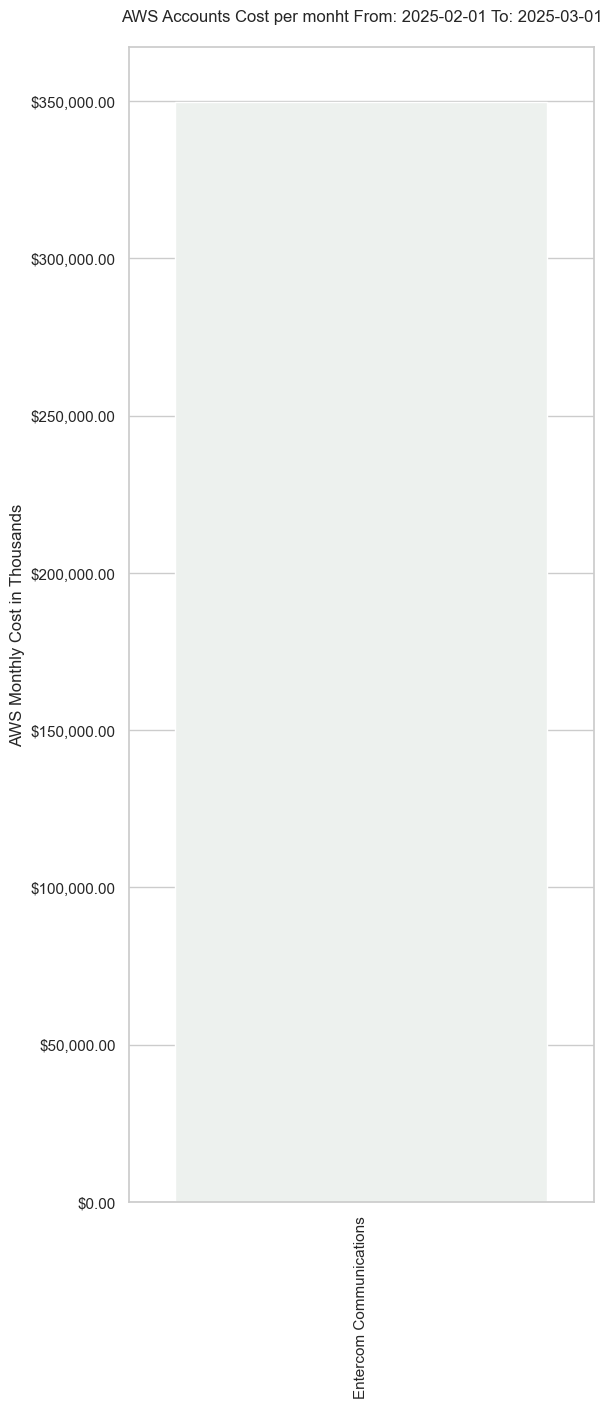

In [24]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 1
#sns.set_color_codes("pastel")
sns.barplot(y="Cost", x="Name", data=total_per_account_df,
            palette='light:g', hue='Name', legend=False)


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ylim=(0, 2500000),
ax.set(xlabel="",
       ylabel="AWS Monthly Cost in Thousands")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_title("AWS Accounts Cost per monht From: " + reportStart + " To: " + reportEnd + '\n')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $200 per monht on AWS Accounts From: 2025-02-01 To: 2025-03-01\n')

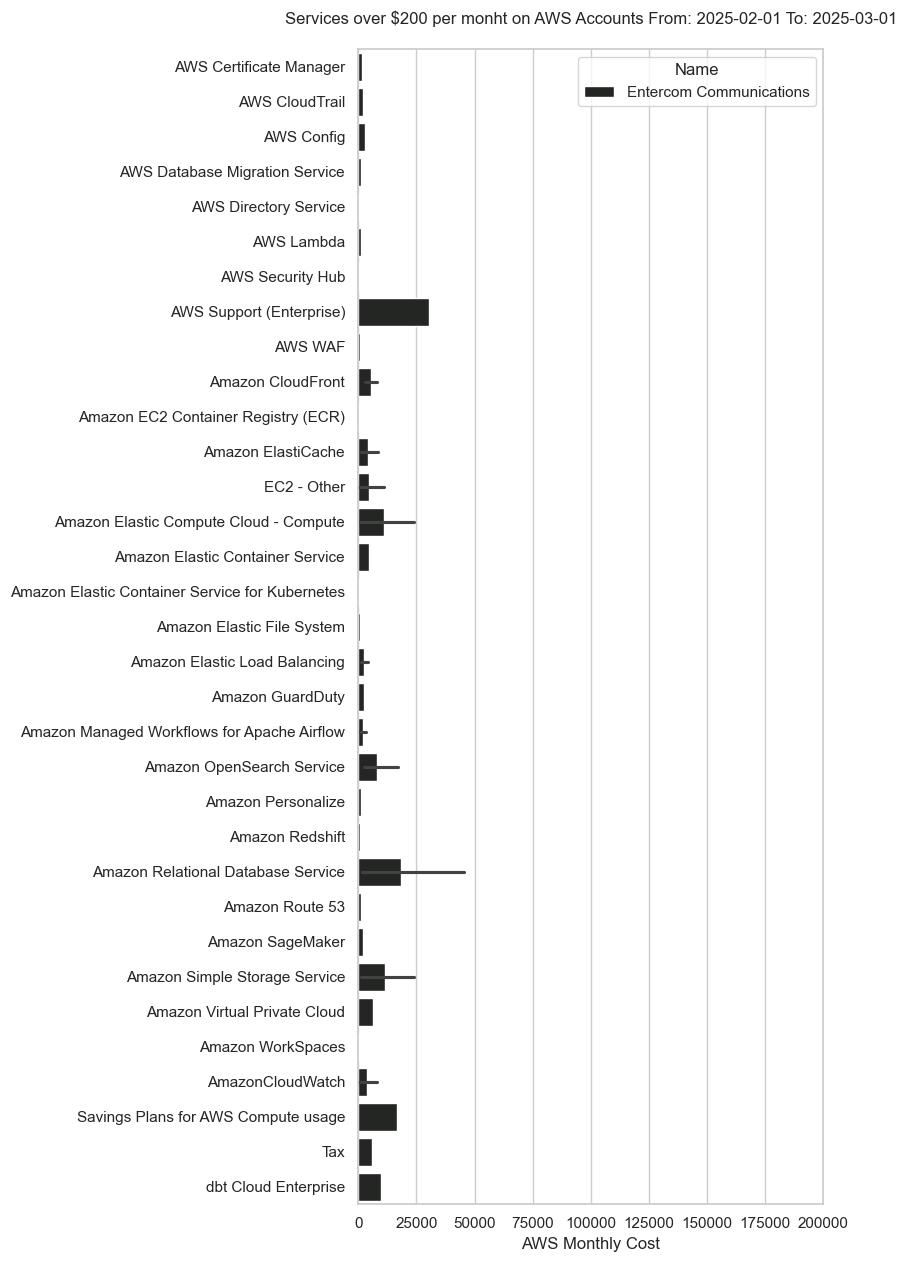

In [25]:

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 200
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Service", data=df[df.Cost >= monthly_cost ],
            palette='dark:g', hue='Name')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $200 per monht on AWS Accounts From: 2025-02-01 To: 2025-03-01\n')

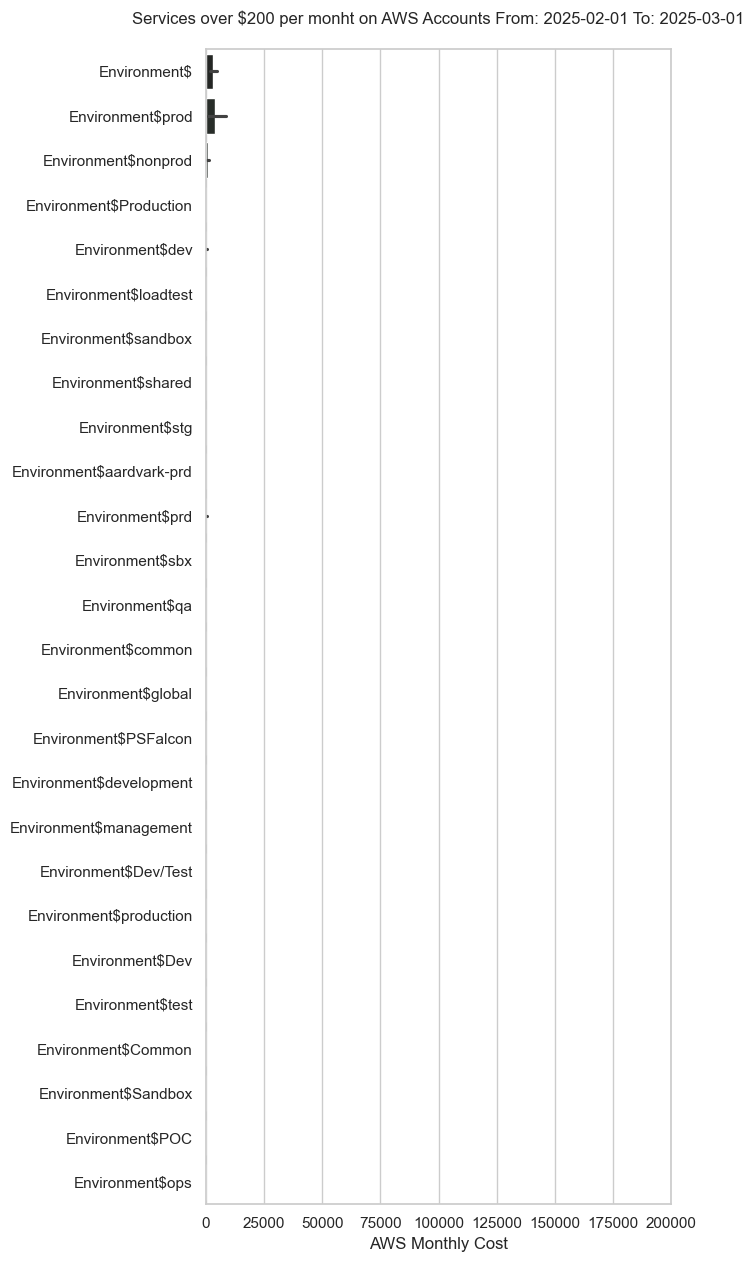

In [26]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 200
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Enviroment", data=df,
            palette='dark:g', hue='Enviroment')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

<Axes: >

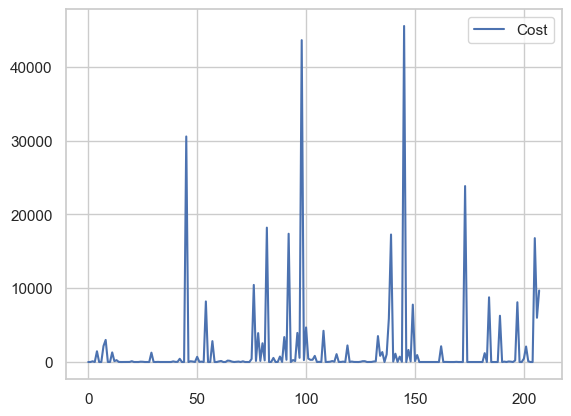

In [27]:
df.plot()

In [29]:
df[df['Cost'] > 200000]

,Month,Year,Name,Account,Service,Cost,Enviroment


In [30]:
df.iloc[200]

Month                             FEB
Year                             2025
Name          Entercom Communications
Account                  724972922289
Service              AmazonCloudWatch
Cost                       462.506817
Enviroment        Environment$nonprod
Name: 200, dtype: object

In [31]:
total_per_service_df = df.groupby(['Year','Service','Name']).agg(Total=('Cost','sum'))

In [32]:
total_per_service_df.head()

Total
Year Service                 Name                                
2025 AWS Amplify             Entercom Communications     0.002676
     AWS Backup              Entercom Communications    96.094841
     AWS Budgets             Entercom Communications     0.273000
     AWS Certificate Manager Entercom Communications  1456.000000
     AWS CloudFormation      Entercom Communications     0.000000

In [33]:
services_df = total_per_service_df[total_per_service_df['Total'] > 0.05000].sort_values(['Name','Total'])

In [34]:
services_df

Total
Year Service                                            Name                                 
2025 AWS Systems Manager                                Entercom Communications      0.071280
     AWS Budgets                                        Entercom Communications      0.273000
     Aviatrix Secure Networking Platform Metered - 2... Entercom Communications      0.900000
     Amazon Macie                                       Entercom Communications      1.122030
     Amazon Glacier                                     Entercom Communications      1.258131
...                                                                                       ...
     Amazon OpenSearch Service                          Entercom Communications  24255.245132
     AWS Support (Enterprise)                           Entercom Communications  30553.213600
     Amazon Simple Storage Service                      Entercom Communications  33815.494408
     Amazon Relational Database Service                 Entercom Communications  55142.871388
     Amazon Elastic Compute Cloud - Compute             Entercom Communications  66137.397556

[70 rows x 1 columns]

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_54067/1883216754.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


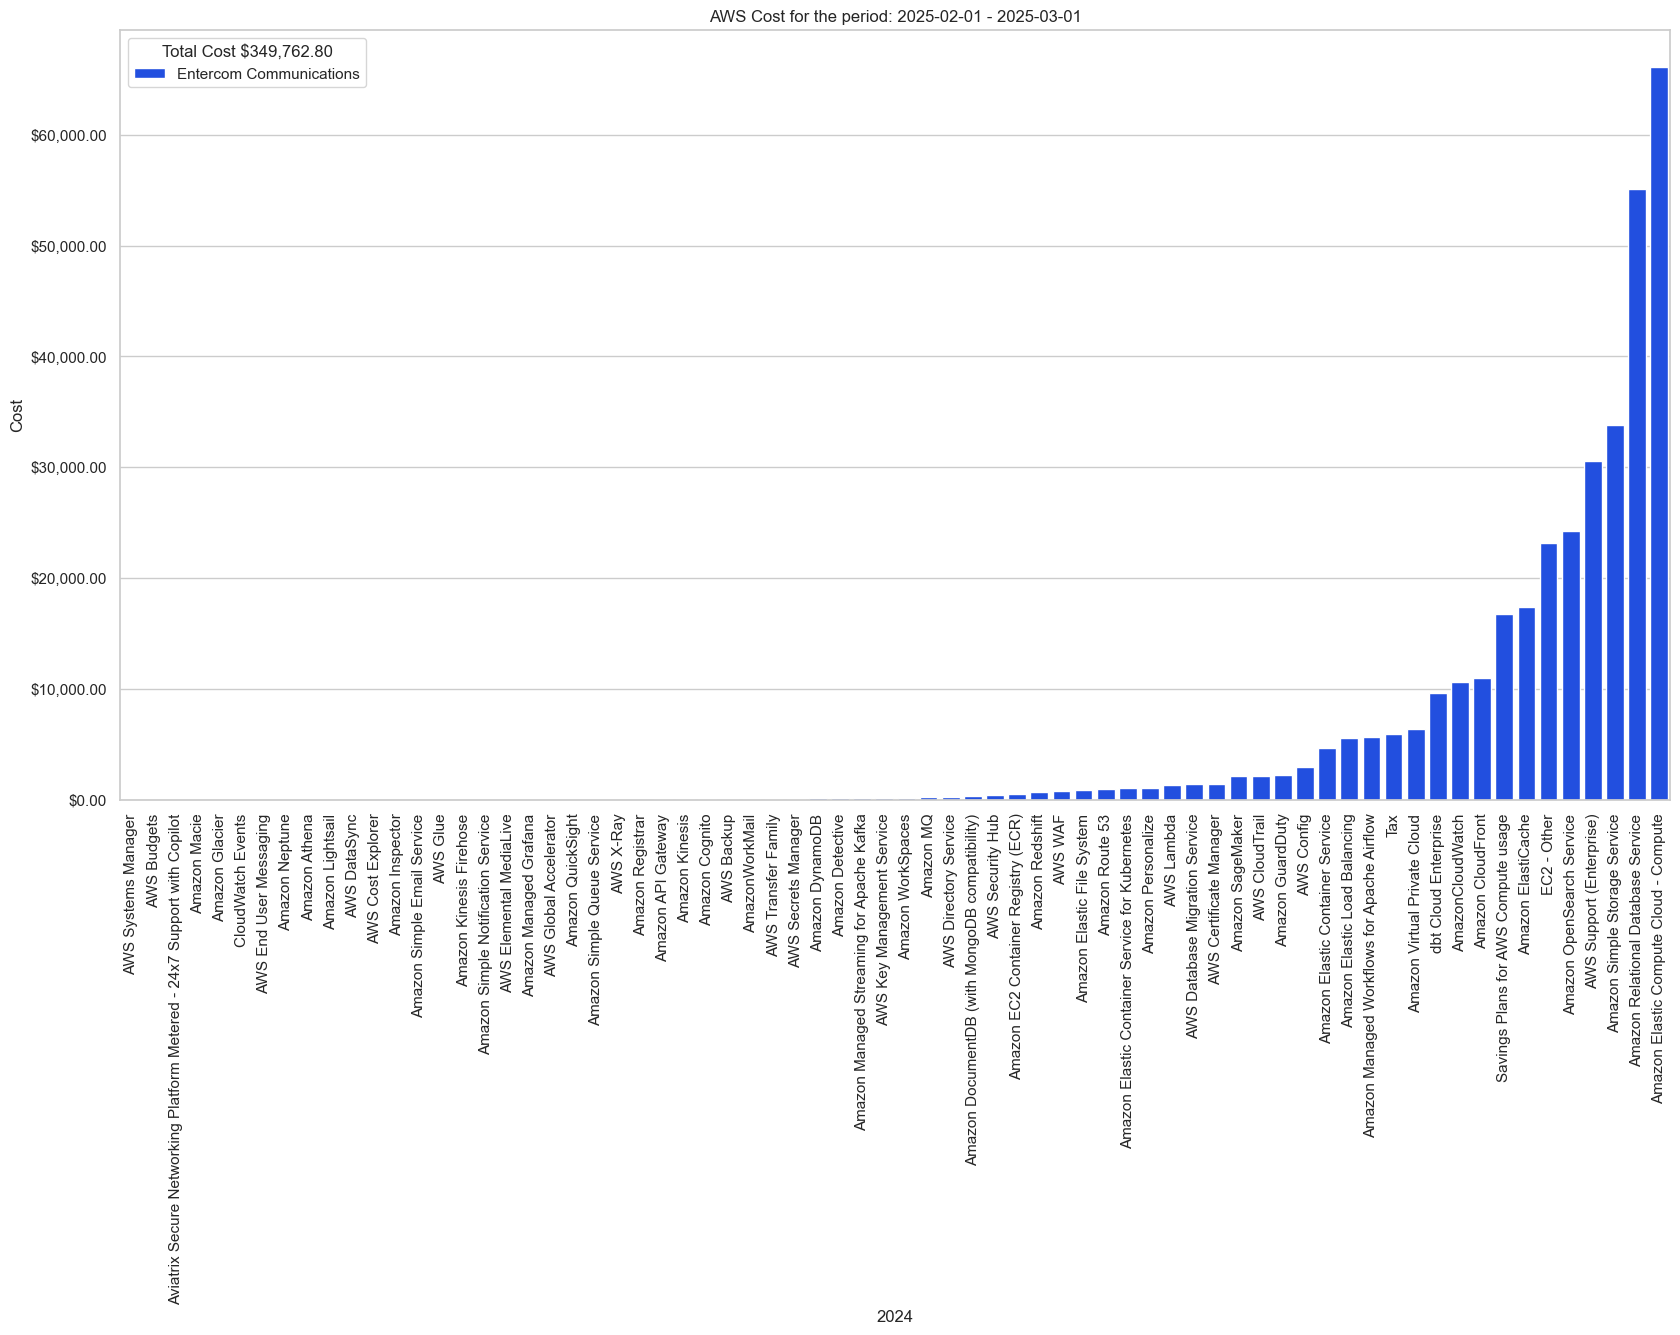

In [35]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Name', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("2024")
ax.set_ylabel("Cost")
ax.set_title("AWS Cost for the period: "+ reportStart+" - " + reportEnd)
t = services_df['Total'].sum()
#t = services_df['Total'].sum() - (2 * df_AW['Cost'].sum())
#t_aw = df_AW['Cost'].sum()
# ax.legend(title="Total Cost without AW $"+str("{:,.2f}".format(t))+" --- AW Cost $ "+str("{:,.2f}".format(t_aw)))
ax.legend(title="Total Cost $"+str("{:,.2f}".format(t)))
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $100,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

# Reading all CSV Files:

In [4]:
import glob

# Get a list of all CSV files in the directory
csv_files = glob.glob('Monthly_Cost_For_*.csv')

# Create an empty list to store the DataFrames
dfs = [] 

# Loop over each CSV file and read it into a DataFrame
for file in csv_files:
    print("reading File: " + file)
    df = pd.read_csv(file) 
    dfs.append(df) 

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, axis=0, ignore_index=True) 
month_name = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_number = [1,2,3,4,5,6,7,8,9,10,11,12]
kafka_new ='Apache Kafka® & Apache Flink® on Confluent Cloud™ - Annual Commits'
kafka_old ='Apache Kafka® on Confluent Cloud™ - Annual Commits'
combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)
combined_df['Service'] = combined_df['Service'].replace('Datadog Pro','Datadog')
combined_df['Service'] = combined_df['Service'].replace(kafka_old,kafka_new)

# Print the combined DataFrame
combined_df.sample(30)

reading File: Monthly_Cost_For_OCT_2022.csv
reading File: Monthly_Cost_For_OCT_2023.csv
reading File: Monthly_Cost_For_OCT_2021.csv
reading File: Monthly_Cost_For_FEB_2024.csv
reading File: Monthly_Cost_For_JUN_2023.csv
reading File: Monthly_Cost_For_JUN_2022.csv
reading File: Monthly_Cost_For_FEB_2025.csv
reading File: Monthly_Cost_For_OCT_2024.csv
reading File: Monthly_Cost_For_FEB_2022.csv
reading File: Monthly_Cost_For_JUN_2024.csv
reading File: Monthly_Cost_For_FEB_2023.csv
reading File: Monthly_Cost_For_NOV_2022.csv
reading File: Monthly_Cost_For_NOV_2023.csv
reading File: Monthly_Cost_For_NOV_2021.csv
reading File: Monthly_Cost_For_AUG_2024.csv
reading File: Monthly_Cost_For_JAN_2022.csv
reading File: Monthly_Cost_For_JAN_2023.csv
reading File: Monthly_Cost_For_DEC_2024.csv
reading File: Monthly_Cost_For_NOV_2024.csv
reading File: Monthly_Cost_For_DEC_2021.csv
reading File: Monthly_Cost_For_AUG_2022.csv
reading File: Monthly_Cost_For_DEC_2023.csv
reading File: Monthly_Cost_For_J

/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_17801/214107491.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)


,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
4259,173,DEC,2021,Entercom Communications,724972922289,Amazon Simple Notification Service,0.000175,NaN,12
6140,101,MAY,2024,Entercom Communications,724972922289,Amazon Elastic Container Service for Kubernetes,689.706849,NaN,5
6822,140,MAR,2022,Entercom Communications,724972922289,Amazon OpenSearch Service,5049.273283,NaN,3
3703,47,DEC,2024,Entercom Communications,724972922289,AWS WAF,11.266592,NaN,12
7223,108,JUL,2022,Entercom Communications,724972922289,Amazon Elastic Compute Cloud - Compute,5261.046912,NaN,7
2847,58,NOV,2021,Entercom Communications,724972922289,Amazon EC2 Container Registry (ECR),0.477094,NaN,11
5962,134,JUL,2024,Entercom Communications,724972922289,Amazon Managed Workflows for Apache Airflow,6771.240459,NaN,7
1228,161,JUN,2022,Entercom Communications,724972922289,Amazon Route 53,0.090500,NaN,6
7065,163,JUL,2023,Entercom Communications,724972922289,Amazon Simple Notification Service,0.000261,NaN,7
838,196,FEB,2024,Entercom Communications,724972922289,AmazonCloudWatch,2.103345,NaN,2


In [4]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
total_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg(Total_cost_per_Month=('Cost','sum')).sort_values(by='Month No')
total_per_month_df['Cost_in_Millions'] = total_per_month_df['Total_cost_per_Month']/1000
total_per_month_df 

,,,Total_cost_per_Month,Cost_in_Millions
Year,Month,Month No,,
2025,JAN,1,9.560546e+05,956.054633
2023,JAN,1,6.575551e+05,657.555146
2024,JAN,1,8.108048e+05,810.804834
2022,JAN,1,4.806844e+05,480.684441
2023,FEB,2,6.126164e+05,612.616381
2024,FEB,2,6.158228e+05,615.822808
2025,FEB,2,3.497628e+05,349.762805
2022,FEB,2,4.958688e+05,495.868775
2024,MAR,3,9.899129e+05,989.912922


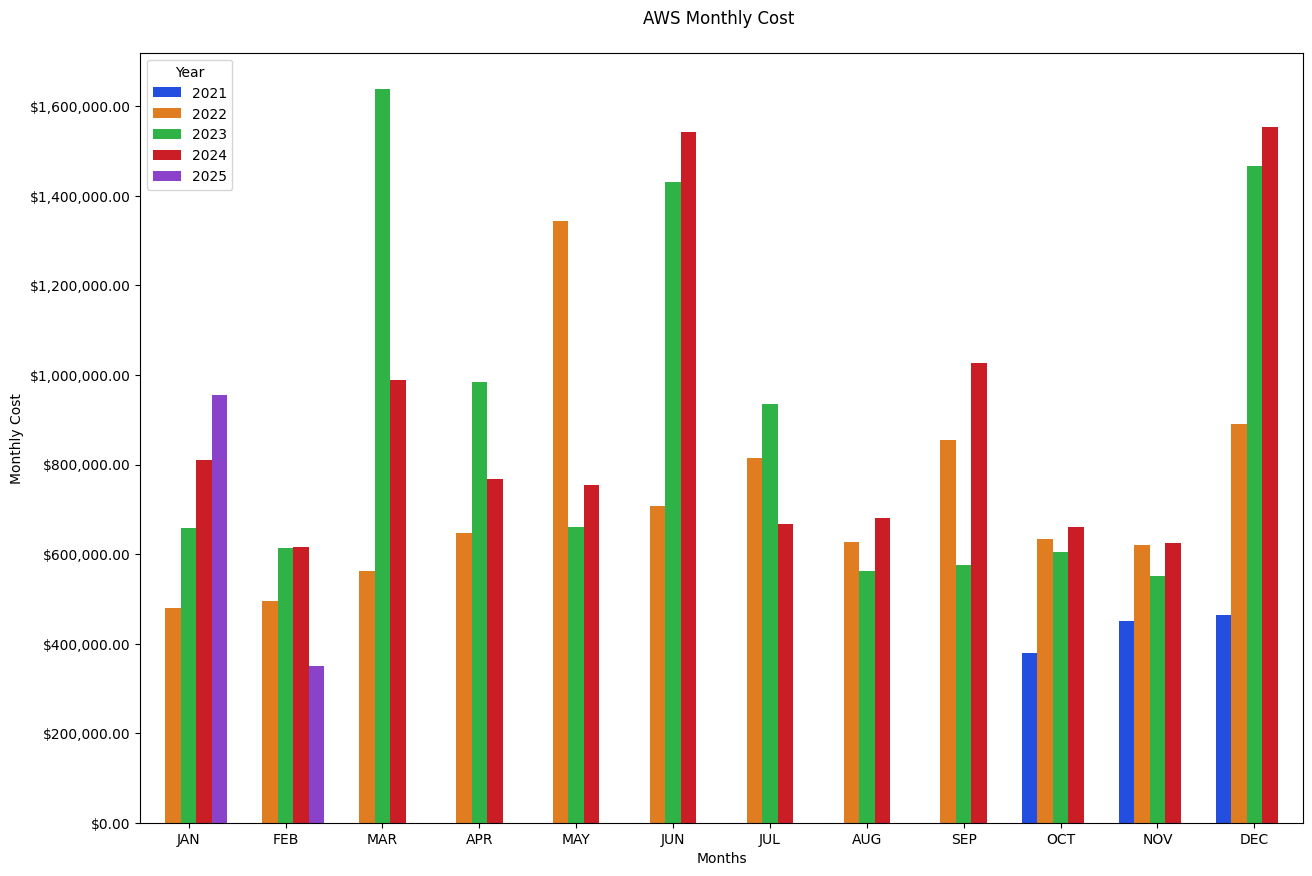

In [5]:

# Initialize the matplotlib figure
#sns.color_palette("viridis", as_cmap=True)
sns.color_palette("bright")
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Month", y="Total_cost_per_Month", data=total_per_month_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Months")
ax.set_ylabel("Monthly Cost")
ax.set_title("AWS Monthly Cost \n")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Monthly Cost")


#sns.despine(left=True, bottom=True)

In [6]:
df_c = combined_df.copy()
#df = combined_df[combined_df['Month No'] == 6]
#df = combined_df[combined_df['Year'] == 2024]

In [7]:
df_c.shape

(8894, 9)

In [8]:
df_c[df_c['Service'] == 'Datadog Pro']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No


In [9]:
df_c[df_c['Service'] == 'Datadog']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
1062,206,JUN,2023,Entercom Communications,724972922289,Datadog,796054.59,NaN,6
2135,206,JUN,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,6
3866,210,DEC,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,12
4736,206,DEC,2023,Entercom Communications,724972922289,Datadog,560894.70,NaN,12
5389,219,DEC,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,12
7559,214,MAR,2023,Entercom Communications,724972922289,Datadog,235159.90,NaN,3
8886,214,SEP,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,9


In [10]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
#total_per_service_df = combined_df[combined_df['Month No'] == 6]
start_year = 2024
total_per_service_df = df_c[df_c['Year'] >= start_year ].groupby(['Year','Service']).agg(Total=('Cost','sum'))


In [11]:
total_per_service_df.head()

Total
Year Service                              
2024 AWS Amplify                  0.013708
     AWS Backup                1687.165501
     AWS Budgets                  3.219950
     AWS Certificate Manager  17456.000000
     AWS CloudFormation           0.000000

In [12]:
anual_cost = 10000
services_df = total_per_service_df[total_per_service_df['Total'] > anual_cost]


In [13]:
services_df

Total
Year Service                                                         
2024 AWS Certificate Manager                             1.745600e+04
     AWS CloudTrail                                      1.133030e+05
     AWS Config                                          3.452986e+04
     AWS Lambda                                          2.819787e+04
     AWS Support (Enterprise)                            5.729698e+05
     AWS WAF                                             1.039288e+04
     Amazon CloudFront                                   2.166744e+05
     Amazon ElastiCache                                  3.073299e+05
     Amazon Elastic Compute Cloud - Compute              1.137461e+06
     Amazon Elastic Container Service                    1.287271e+05
     Amazon Elastic Container Service for Kubernetes     5.027647e+04
     Amazon Elastic File System                          2.190191e+04
     Amazon Elastic Load Balancing                       1.294244e+05
     Amazon GuardDuty                                    5.716503e+04
     Amazon MQ                                           1.334562e+04
     Amazon Managed Workflows for Apache Airflow         1.372179e+05
     Amazon OpenSearch Service                           7.139758e+05
     Amazon Personalize                                  2.611176e+04
     Amazon Redshift                                     2.056085e+04
     Amazon Relational Database Service                  9.809715e+05
     Amazon Route 53                                     1.820145e+04
     Amazon SageMaker                                    4.705536e+04
     Amazon Simple Storage Service                       8.278626e+05
     Amazon Virtual Private Cloud                        2.293490e+05
     AmazonCloudWatch                                    2.497188e+05
     Apache Kafka® & Apache Flink® on Confluent Clou...  1.125977e+06
     CrowdStrike Falcon Endpoint Protection              3.222409e+05
     Datadog                                             9.890880e+05
     EC2 - Other                                         5.956948e+05
     Normalyze - Cloud Data Security Platform            9.999723e+04
     OCBCloudFront                                       2.720436e+04
     Red Canary Managed Detection and Response           2.272176e+05
     Savings Plans for AWS Compute usage                 6.223369e+05
     Tax                                                 2.836453e+05
     WIZ Cloud Infrastructure Security Platform          2.083334e+05
     dbt Cloud Enterprise                                3.831250e+04
2025 AWS Support (Enterprise)                            7.980000e+04
     Amazon CloudFront                                   3.449139e+04
     Amazon ElastiCache                                  5.029179e+04
     Amazon Elastic Compute Cloud - Compute              1.627911e+05
     Amazon Elastic Container Service                    1.430577e+04
     Amazon Elastic Load Balancing                       1.718441e+04
     Amazon Managed Workflows for Apache Airflow         1.599897e+04
     Amazon OpenSearch Service                           8.432271e+04
     Amazon Relational Database Service                  1.579741e+05
     Amazon Simple Storage Service                       9.784570e+04
     Amazon Virtual Private Cloud                        2.133108e+04
     AmazonCloudWatch                                    3.222532e+04
     EC2 - Other                                         7.058462e+04
     Red Canary Managed Detection and Response           2.341440e+05
     Savings Plans for AWS Compute usage                 7.416540e+04
     Tax                                                 3.243320e+04
     Upwind Runtime-Powered Cloud Security Platform      4.800000e+04

In [14]:
combined_df[combined_df['Service'] == 'Red Canary Managed Detection and Response']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
4953,210,JAN,2024,Entercom Communications,724972922289,Red Canary Managed Detection and Response,227217.6,NaN,1
5166,208,JAN,2025,Entercom Communications,724972922289,Red Canary Managed Detection and Response,234144.0,Environment$,1


/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11434/1879410909.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


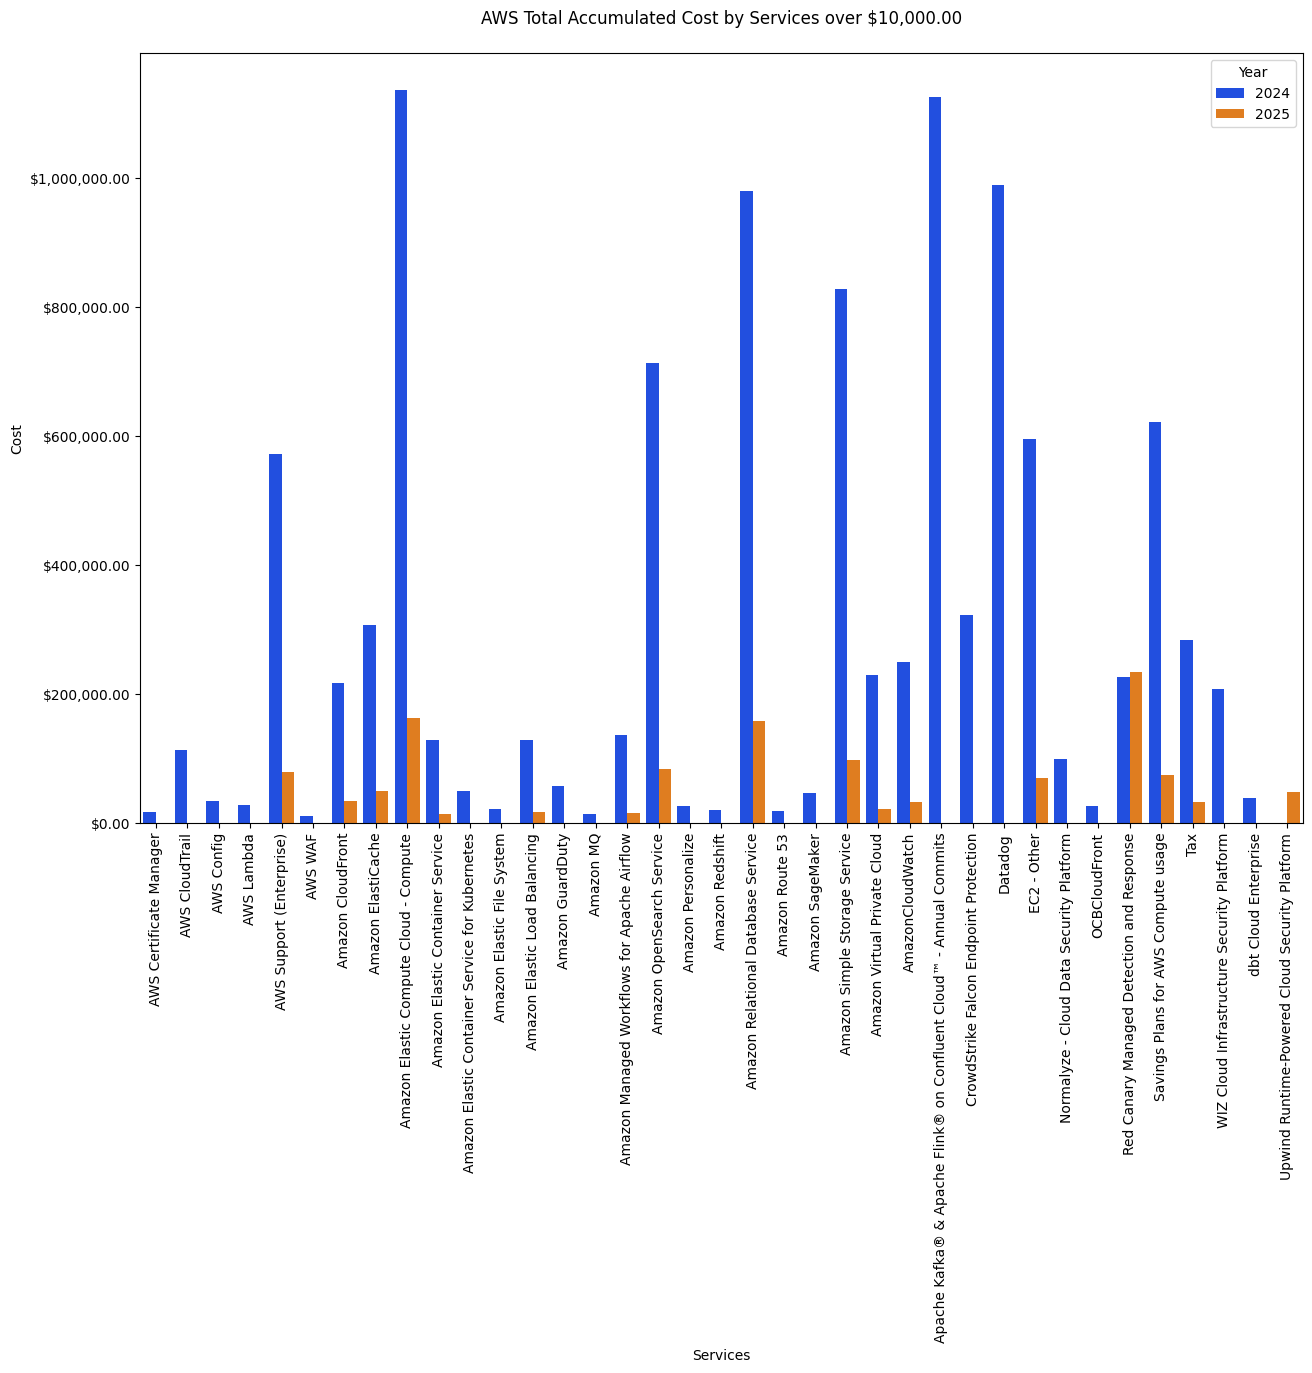

In [15]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Services")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Services over " + "${:,.2f}".format(int(anual_cost)) + "\n")
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $10,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

In [16]:
total_per_account_df = combined_df.groupby(['Year','Name']).agg(Total=('Cost','sum'))

In [18]:
total_per_account_df

,,Total
Year,Name,
2021,Entercom Communications,1.294031e+06
2022,Entercom Communications,8.677296e+06
2023,Entercom Communications,1.068157e+07
2024,Entercom Communications,1.069632e+07
2025,Entercom Communications,1.305817e+06


/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11434/4280847152.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


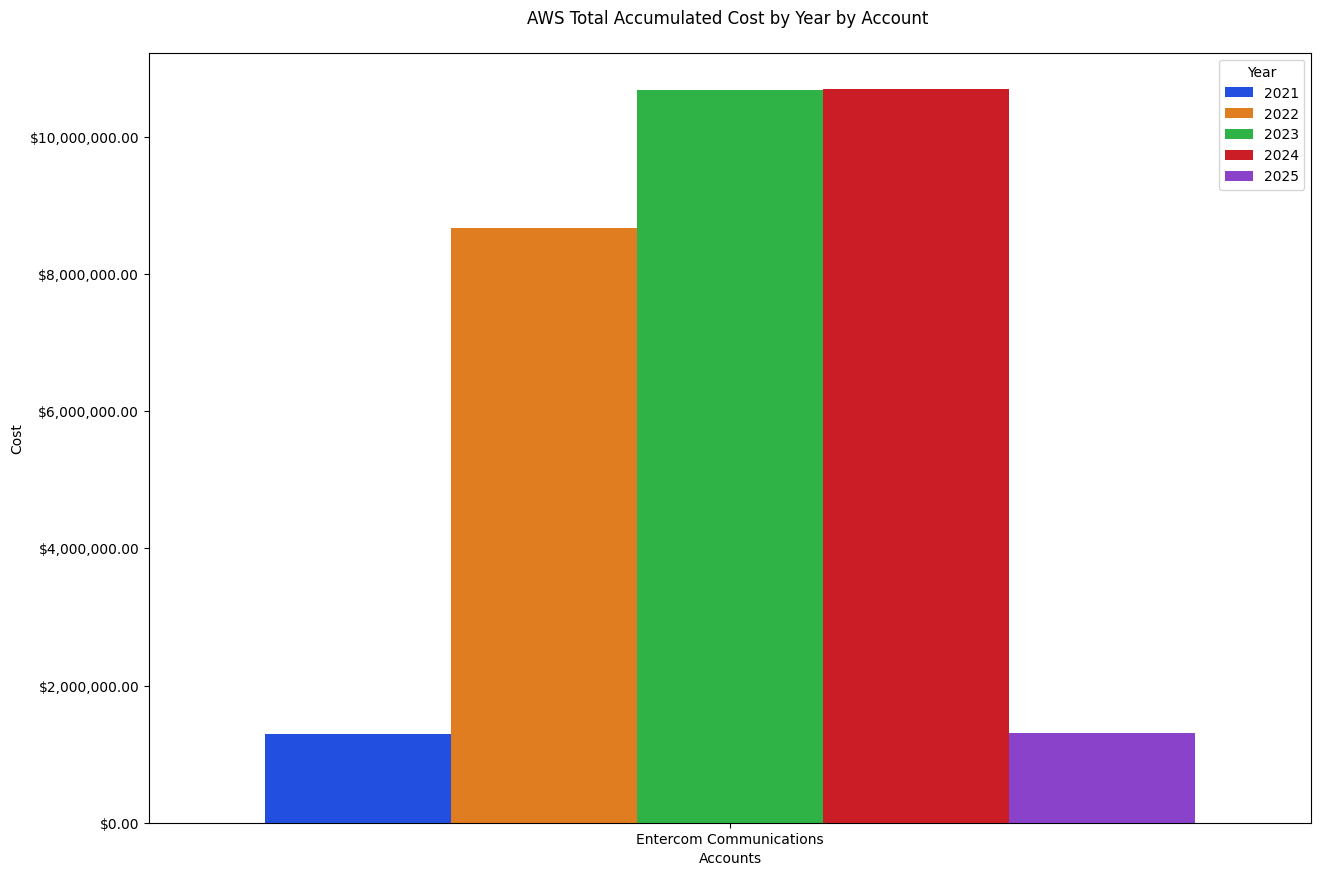

In [19]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Name", y="Total", data=total_per_account_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Accounts")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Year by Account \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost")

# Time Series Exploration 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [21]:
combined_df.sample(10)

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
3019,15,AUG,2024,Entercom Communications,724972922289,AWS End User Messaging,2.730000,NaN,8
719,77,FEB,2024,Entercom Communications,724972922289,Amazon ElastiCache,4163.916765,NaN,2
165,165,OCT,2022,Entercom Communications,724972922289,Amazon SageMaker,1484.846130,NaN,10
1703,206,OCT,2024,Entercom Communications,724972922289,CloudWatch Events,0.664357,NaN,10
6924,22,JUL,2023,Entercom Communications,724972922289,AWS Key Management Service,0.905969,NaN,7
8172,165,APR,2023,Entercom Communications,724972922289,Amazon Route 53,3.241286,NaN,4
3012,8,AUG,2024,Entercom Communications,724972922289,AWS Config,2188.703426,NaN,8
3144,140,AUG,2024,Entercom Communications,724972922289,Amazon OpenSearch Service,11547.630690,NaN,8
1138,71,JUN,2022,Entercom Communications,724972922289,Amazon ElastiCache,500.428800,NaN,6
6702,20,MAR,2022,Entercom Communications,724972922289,AWS Key Management Service,1.824224,NaN,3


In [22]:
df1 =combined_df.copy()
df1['Date_str'] = df1['Year'].apply(lambda x: str(x)) + "-" + df1['Month No'].apply(lambda x: str(x)) + "-01"
df1['Date'] = pd.to_datetime(df1['Date_str'])
df1 = df1.groupby(by=['Date']).agg({'Cost':sum})
df1.sort_index(inplace=True)
df1 = df1.resample('MS').sum()
df1['Cost'].sum()

/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11434/1614081839.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = df1.groupby(by=['Date']).agg({'Cost':sum})


32655037.922674548

[Text(0, 0.5, 'Total Monthly Cost')]

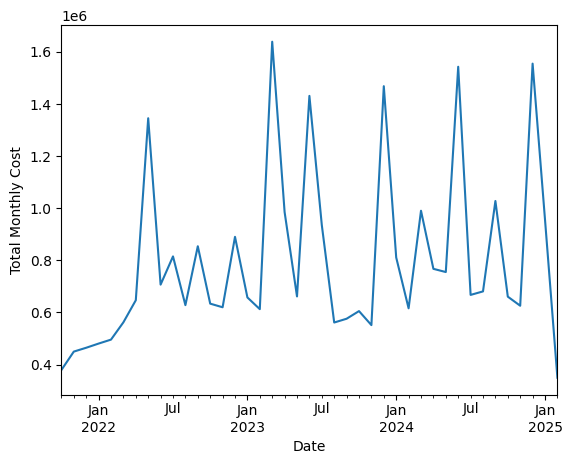

In [23]:
ax = df1['Cost'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Total Monthly Cost')

In [27]:
import seasonal

In [28]:
def seasonal_period_udf(counts):
    seasons, trend = seasonal.fit_seasons(counts, trend="spline")
    if (seasons is not None): 
        return len(seasons)
    else: 
        return -1

In [29]:
seasonal_period_udf(df1['Cost'].values)

6

# Trend calculation
We can use functionalitis of statsmodels to get the trend value from a time series data.
Here we can use statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600) the Hodrick Prescott filter. It filter out time series
yt τt ct

In [30]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#get the values
cost_cycle, cost_trend = hpfilter(df1['Cost'], lamb=1200)

In [31]:
cost_cycle

Date
2021-10-01   -103458.569774
2021-11-01    -63384.978962
2021-12-01    -78930.111019
2022-01-01    -93019.938340
2022-02-01   -107496.679760
2022-03-01    -70083.213157
2022-04-01    -13328.500753
2022-05-01    658093.265760
2022-06-01     -4251.864886
2022-07-01     81428.286821
2022-08-01   -126256.747455
2022-09-01     80370.953118
2022-10-01   -157435.064545
2022-11-01   -187665.581042
2022-12-01     67431.178817
2023-01-01   -178402.546478
2023-02-01   -235155.745890
2023-03-01    780264.239889
2023-04-01    119612.812184
2023-05-01   -209448.448932
2023-06-01    555743.134531
2023-07-01     58584.046535
2023-08-01   -316154.838422
2023-09-01   -302210.868785
2023-10-01   -273418.509861
2023-11-01   -327695.945409
2023-12-01    587748.474627
2024-01-01    -69110.313944
2024-02-01   -263984.614987
2024-03-01    110425.365932
2024-04-01   -111584.626656
2024-05-01   -122742.514399
2024-06-01    666080.358982
2024-07-01   -206080.526968
2024-08-01   -189448.115882
2024-09-01    1

In [32]:
type(cost_cycle)

pandas.core.series.Series

In [33]:
cost_trend

Date
2021-10-01    482894.246818
2021-11-01    513296.852014
2021-12-01    543613.241736
2022-01-01    573704.379691
2022-02-01    603365.454499
2022-03-01    632314.138159
2022-04-01    660178.522107
2022-05-01    686528.295101
2022-06-01    710922.038815
2022-07-01    733466.745975
2022-08-01    754265.866091
2022-09-01    773490.705575
2022-10-01    791207.356885
2022-11-01    807548.888271
2022-12-01    822517.172099
2023-01-01    835957.692747
2023-02-01    847772.127245
2023-03-01    857713.483834
2023-04-01    865338.807631
2023-05-01    870855.363957
2023-06-01    874570.095471
2023-07-01    876615.404464
2023-08-01    877586.812501
2023-09-01    878128.661188
2023-10-01    878621.829765
2023-11-01    879195.355082
2023-12-01    879750.425231
2024-01-01    879915.148347
2024-02-01    879807.422963
2024-03-01    879487.555684
2024-04-01    878795.865934
2024-05-01    877664.694276
2024-06-01    875933.394085
2024-07-01    873339.033306
2024-08-01    870173.746851
2024-09-01    8

In [34]:
df1['Trend'] = cost_trend

In [35]:
df1.sample(10)

,Cost,Trend
Date,,
2024-02-01,6.158228e+05,879807.422963
2024-10-01,6.605933e+05,862454.128039
2022-10-01,6.337723e+05,791207.356885
2024-07-01,6.672585e+05,873339.033306
2024-06-01,1.542014e+06,875933.394085
2022-01-01,4.806844e+05,573704.379691
2021-11-01,4.499119e+05,513296.852014
2024-04-01,7.672112e+05,878795.865934
2021-12-01,4.646831e+05,543613.241736


# Plot the trend

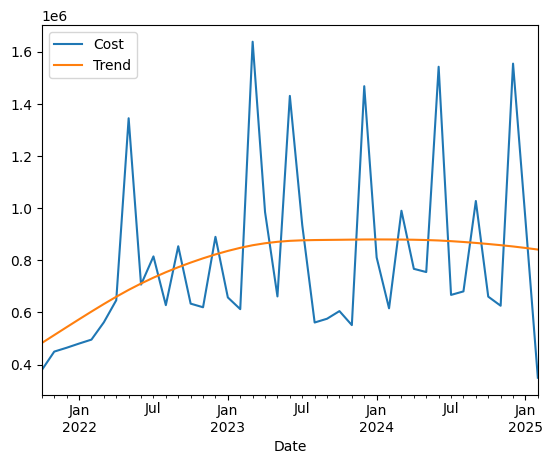

In [36]:
df1[['Cost', 'Trend']].plot().autoscale(axis='x', tight=True)

# Plot the cyclic values

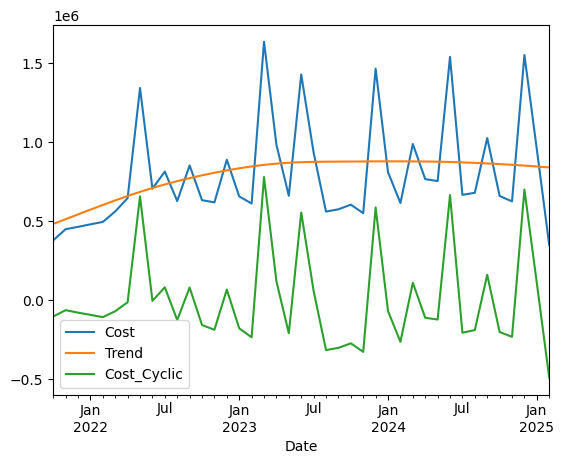

In [37]:
df1['Cost_Cyclic'] = cost_cycle
df1[['Cost', 'Trend', 'Cost_Cyclic']].plot().autoscale(axis='x', tight=True)

# Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points. That is, no matter where you take your
observations, the result should be same. A series that shows seasonality is not stationary.
How to test if a series is stationary?
A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis H0
is that the series is nonstationary, and contains
a unit root. The alternate hypothesis H1
supports stationarity. The augmented Dickey-Fuller and Kwiatkowski-Phillips-Schmidt-Shin tests are
stationarity tests.

In [38]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

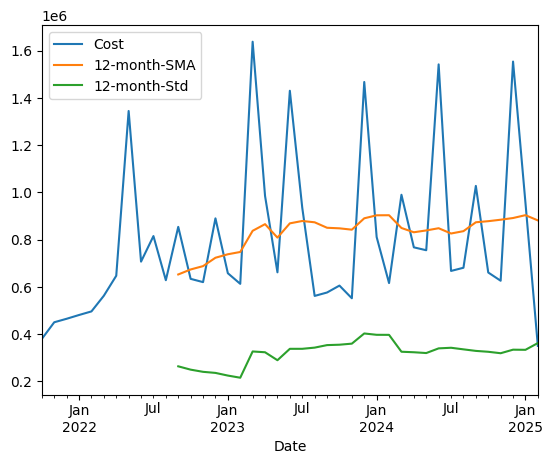

In [39]:
df1['12-month-SMA'] = df1['Cost'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Cost'].rolling(window=12).std()
df1[['Cost','12-month-SMA','12-month-Std']].plot();

In [40]:
print('Augmented Dickey-Fuller Test on Cost Data')
dftest = adfuller(df1['Cost'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Cost Data


(-3.55514948417621,
 0.00667868650321515,
 6,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 845.3380646482528)

In [41]:
print('Augmented Dickey-Fuller Test on Cost Data')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])
for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Cost Data
ADF test statistic      -3.555149
p-value                  0.006679
# lags used              6.000000
# observations          34.000000
critical value (1%)     -3.639224
critical value (5%)     -2.951230
critical value (10%)    -2.614447
dtype: float64


# We reject the Null Hypothesis (H0) so the Data is Stationary 

In [42]:
df1

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std
Date,,,,,
2021-10-01,3.794357e+05,482894.246818,-103458.569774,NaN,NaN
2021-11-01,4.499119e+05,513296.852014,-63384.978962,NaN,NaN
2021-12-01,4.646831e+05,543613.241736,-78930.111019,NaN,NaN
2022-01-01,4.806844e+05,573704.379691,-93019.938340,NaN,NaN
2022-02-01,4.958688e+05,603365.454499,-107496.679760,NaN,NaN
2022-03-01,5.622309e+05,632314.138159,-70083.213157,NaN,NaN
2022-04-01,6.468500e+05,660178.522107,-13328.500753,NaN,NaN
2022-05-01,1.344622e+06,686528.295101,658093.265760,NaN,NaN
2022-06-01,7.066702e+05,710922.038815,-4251.864886,NaN,NaN


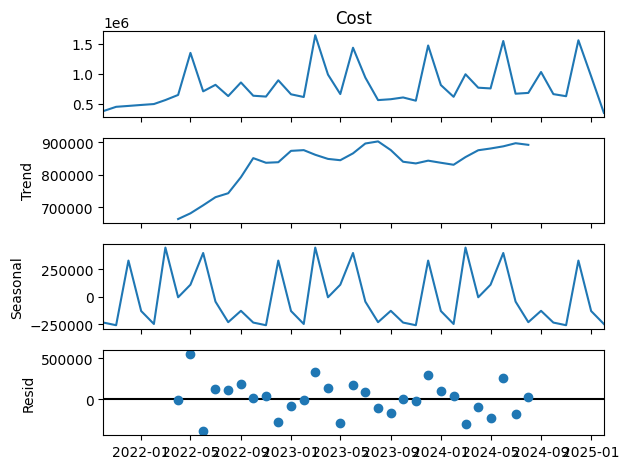

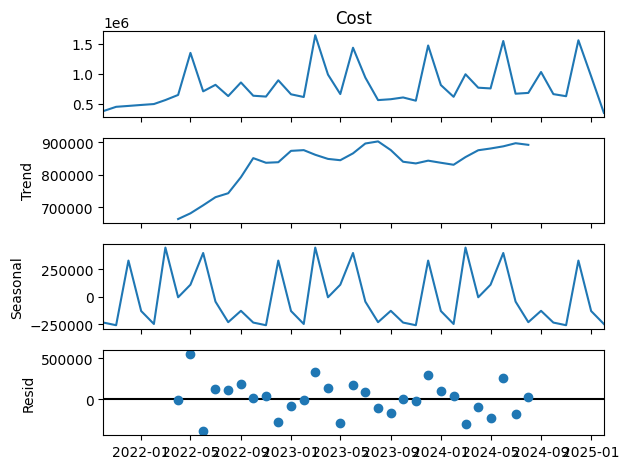

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['Cost'], model='additive')
result.plot()

# Moving average and Exponentially moving avearge

# Simple Moving Average(SMA)

In [44]:
df1['3-month-SMA'] = df1['Cost'].rolling(window=3).mean()
df1['6-month-SMA'] = df1['Cost'].rolling(window=6).mean()
df1.head(10)

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA
Date,,,,,,,
2021-10-01,3.794357e+05,482894.246818,-103458.569774,NaN,NaN,NaN,NaN
2021-11-01,4.499119e+05,513296.852014,-63384.978962,NaN,NaN,NaN,NaN
2021-12-01,4.646831e+05,543613.241736,-78930.111019,NaN,NaN,431343.560271,NaN
2022-01-01,4.806844e+05,573704.379691,-93019.938340,NaN,NaN,465093.148373,NaN
2022-02-01,4.958688e+05,603365.454499,-107496.679760,NaN,NaN,480412.115602,NaN
2022-03-01,5.622309e+05,632314.138159,-70083.213157,NaN,NaN,512928.047031,472135.803651
2022-04-01,6.468500e+05,660178.522107,-13328.500753,NaN,NaN,568316.573698,516704.861036
2022-05-01,1.344622e+06,686528.295101,658093.265760,NaN,NaN,851234.169072,665823.142337
2022-06-01,7.066702e+05,710922.038815,-4251.864886,NaN,NaN,899380.585381,706154.316206


<Axes: xlabel='Date'>

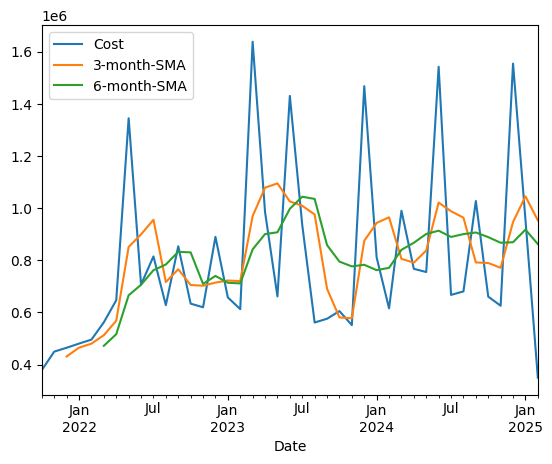

In [45]:
df1[['Cost','3-month-SMA','6-month-SMA']].plot()

# Exponentially weighted moving avearge(EWMA)
It allows to reduce the lag effect from SMA and it will put more weight on values that occured more recently. It does apply more weight on
values that occured more recently. The amount of weight applied to the most recent values will depend on actual parameters used in EWMA
and the number of periods given a window size.

In [46]:
#append ewma for span of three months
df1['3-span-EWMA'] = df1['Cost'].ewm(span=12, adjust=False).mean()

<Axes: xlabel='Date'>

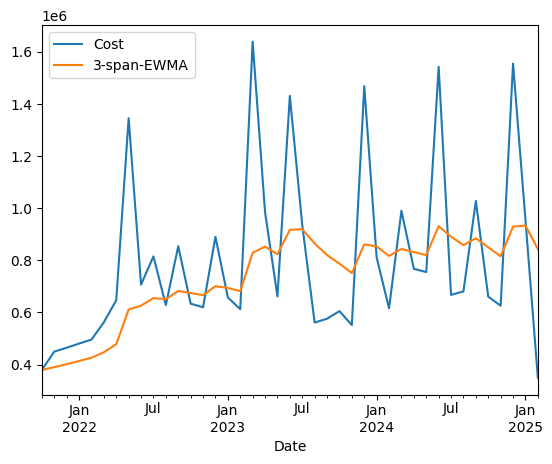

In [47]:
df1[['Cost','3-span-EWMA']].plot()

<Axes: xlabel='Date'>

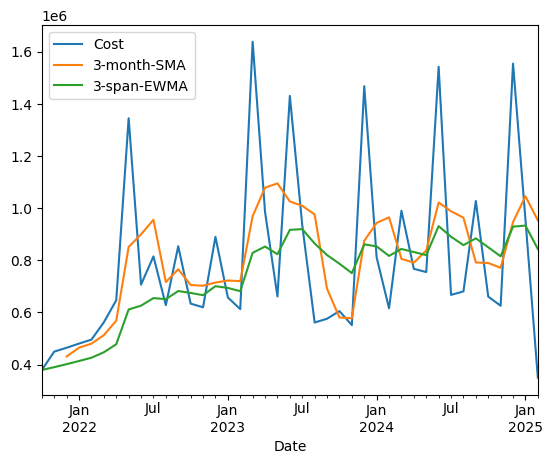

In [48]:
df1[['Cost','3-month-SMA','3-span-EWMA']].plot()

# Simple Exponential Smoothing

In [49]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 3
#define alpha
alpha = 2/(span+1)
#exponentially weightage moving average using pandas
df1['EWMA3'] = df1['Cost'].ewm(alpha=alpha, adjust=False).mean()
#Simple exponential smoothing
df1['SES3'] = SimpleExpSmoothing(df1['Cost']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df1.head()

,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3
Date,,,,,,,,,,
2021-10-01,379435.677044,482894.246818,-103458.569774,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044
2021-11-01,449911.873052,513296.852014,-63384.978962,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048
2021-12-01,464683.130717,543613.241736,-78930.111019,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882
2022-01-01,480684.441351,573704.379691,-93019.938340,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117
2022-02-01,495868.774739,603365.454499,-107496.679760,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928


In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df1['DESAdd'] = ExponentialSmoothing(df1['Cost'], trend='add').fit().fittedvalues.shift(-1)
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd
Date,,,,,,,,,,,
2021-10-01,379435.677044,482894.246818,-103458.569774,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047
2021-11-01,449911.873052,513296.852014,-63384.978962,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711
2021-12-01,464683.130717,543613.241736,-78930.111019,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539
2022-01-01,480684.441351,573704.379691,-93019.938340,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381
2022-02-01,495868.774739,603365.454499,-107496.679760,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123


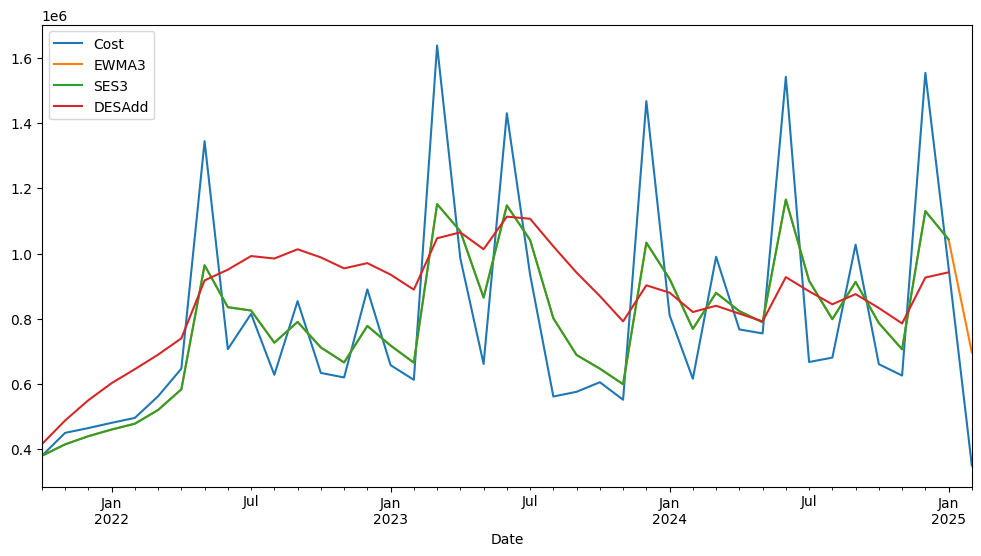

In [51]:
df1[['Cost', 'EWMA3', 'SES3', 'DESAdd']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In [52]:
df1['DESMul'] = ExponentialSmoothing(df1['Cost'], trend='mul').fit().fittedvalues.shift(-1)
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd,DESMul
Date,,,,,,,,,,,,
2021-10-01,379435.677044,482894.246818,-103458.569774,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047,439690.085685
2021-11-01,449911.873052,513296.852014,-63384.978962,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711,551316.736545
2021-12-01,464683.130717,543613.241736,-78930.111019,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539,647089.139053
2022-01-01,480684.441351,573704.379691,-93019.938340,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381,720899.930896
2022-02-01,495868.774739,603365.454499,-107496.679760,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123,768981.429329


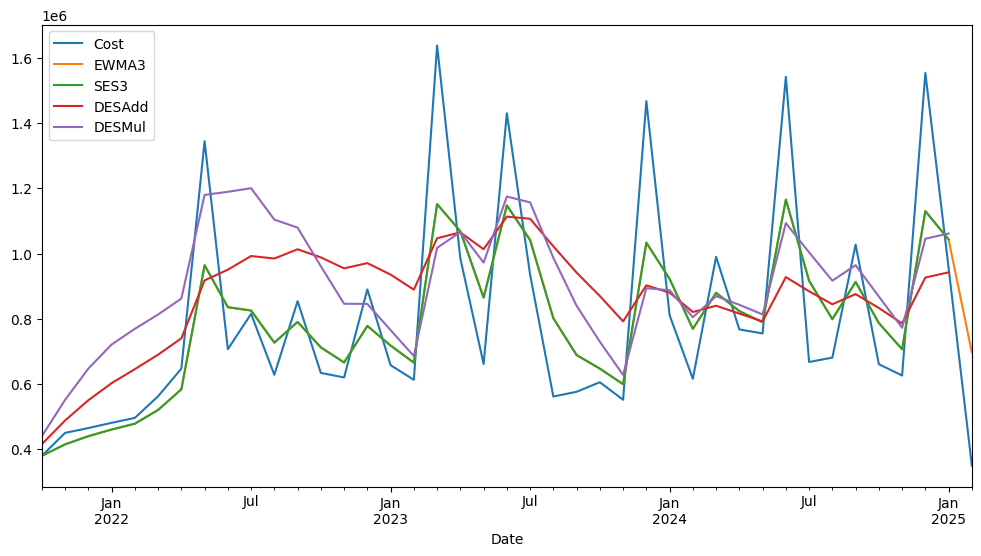

In [53]:
df1[['Cost', 'EWMA3', 'SES3', 'DESAdd', 'DESMul']].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

In [54]:
df1['TESAdd'] = ExponentialSmoothing(df1['Cost'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
df1.head(5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Cost,Trend,Cost_Cyclic,12-month-SMA,12-month-Std,3-month-SMA,6-month-SMA,3-span-EWMA,EWMA3,SES3,DESAdd,DESMul,TESAdd
Date,,,,,,,,,,,,,
2021-10-01,379435.677044,482894.246818,-103458.569774,NaN,NaN,NaN,NaN,379435.677044,379435.677044,379435.677044,415208.937047,439690.085685,4.130417e+05
2021-11-01,449911.873052,513296.852014,-63384.978962,NaN,NaN,NaN,NaN,390278.168738,414673.775048,414673.775048,487889.388711,551316.736545,4.095663e+05
2021-12-01,464683.130717,543613.241736,-78930.111019,NaN,NaN,431343.560271,NaN,401725.085965,439678.452882,439678.452882,550054.616539,647089.139053,1.026736e+06
2022-01-01,480684.441351,573704.379691,-93019.938340,NaN,NaN,465093.148373,NaN,413872.679101,460181.447117,460181.447117,602367.180381,720899.930896,5.232765e+05
2022-02-01,495868.774739,603365.454499,-107496.679760,NaN,NaN,480412.115602,NaN,426487.463046,478025.110928,478025.110928,645290.141123,768981.429329,4.178770e+05


<Axes: xlabel='Date'>

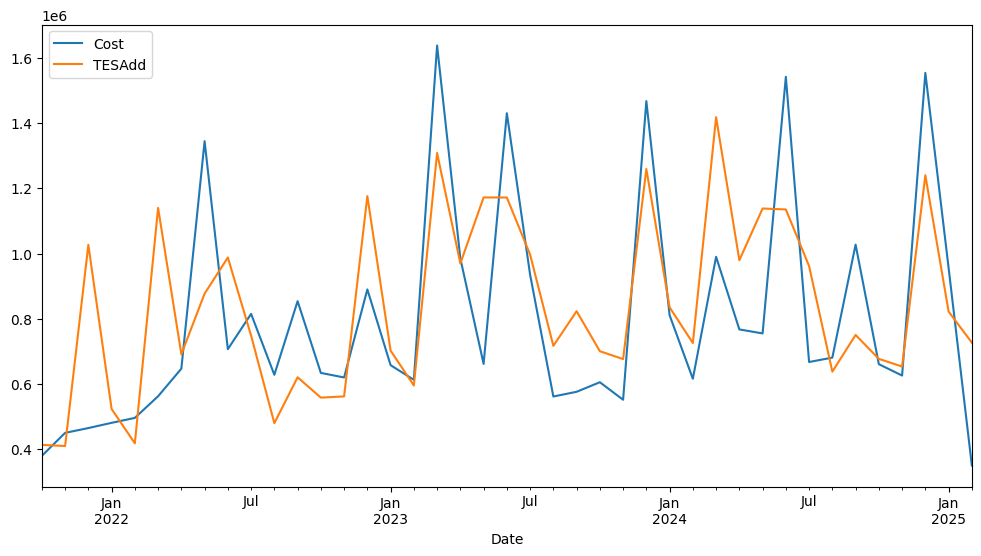

In [55]:
df1[['Cost', 'TESAdd']].plot(figsize=(12, 6))

In [56]:
df1['TESMul'] = ExponentialSmoothing(df1['Cost'], trend='add', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df.head(5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Unnamed: 0,Month,Year,Name,Account,Service,Cost
0,0,SEP,2022,Entercom Communications,724972922289,AWS Backup,2.858410e+00
1,1,SEP,2022,Entercom Communications,724972922289,AWS Backup,1.200000e-08
2,2,SEP,2022,Entercom Communications,724972922289,AWS Backup,4.750796e+02
3,3,SEP,2022,Entercom Communications,724972922289,AWS Certificate Manager,1.810000e+03
4,4,SEP,2022,Entercom Communications,724972922289,AWS Certificate Manager,3.620000e+02


<Axes: xlabel='Date'>

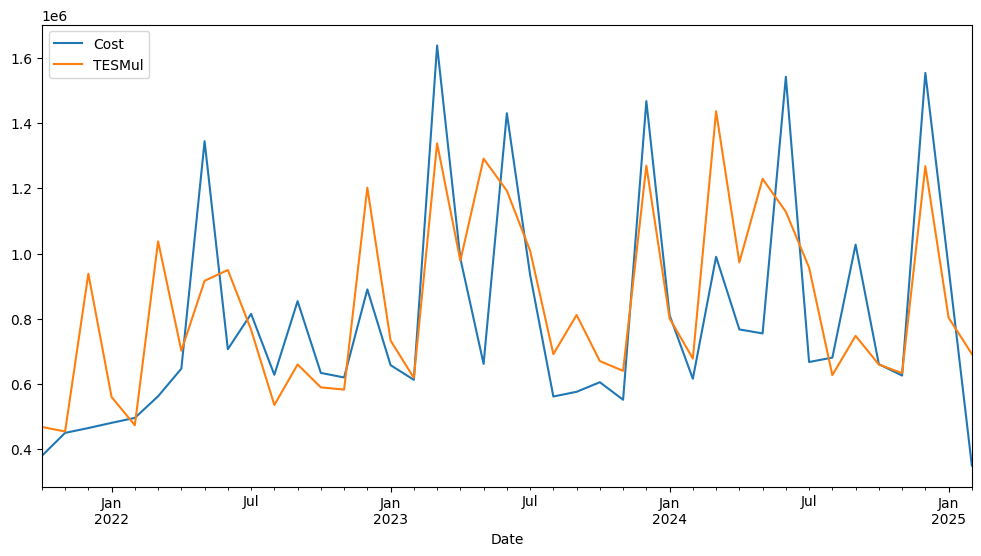

In [57]:
df1[['Cost', 'TESMul']].plot(figsize=(12, 6))

<Axes: xlabel='Date'>

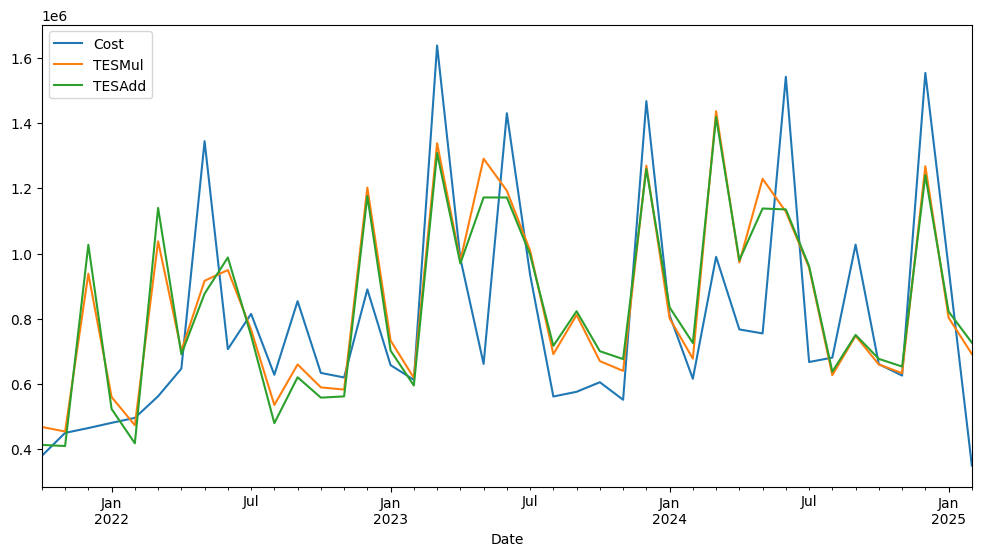

In [58]:
df1[['Cost', 'TESMul', 'TESAdd']].plot(figsize=(12, 6))

# XGBoost Machine Learning Modeling 
https://www.youtube.com/watch?v=vV12dGe_Fho

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb # brew install libomp
#from xgboost.sklearn import XGBClassifier
#from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [103]:
#df_ml =combined_df.copy()
#df_ml['Date_str'] = df_ml['Year'].apply(lambda x: str(x)) + "-" + df_ml['Month No'].apply(lambda x: str(x)) + "-01"
#df_ml['Date'] = pd.to_datetime(df_ml['Date_str'])
#df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})
#df_ml.sort_index(inplace=True)
#df_ml = df_ml.resample('MS').sum()
#df_ml['Cost'].sum()

In [5]:
df_ml =combined_df.copy()
df_ml['Date_str'] = df_ml['Year'].apply(lambda x: str(x)) + "-" + df_ml['Month No'].apply(lambda x: str(x)) + "-01"
df_ml['Date'] = pd.to_datetime(df_ml['Date_str'])
df_ml.set_index('Date')
df_ml.index = pd.to_datetime(df_ml.index)
df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})

/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11765/1207078737.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_ml = df_ml.groupby(by=['Date']).agg({'Cost':sum})


In [6]:
df_ml.columns

Index(['Cost'], dtype='object')

In [176]:
# df_ml.drop(['Month','Year','Name','Account','Service','Enviroment','Month No','Date_str','Unnamed: 0'],axis=1, inplace=True)

In [177]:
# df_ml = df_ml[['Date','Cost']]

In [7]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2021-10-01 to 2025-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cost    41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


<Axes: title={'center': 'AWS Total Cost'}, xlabel='Date'>

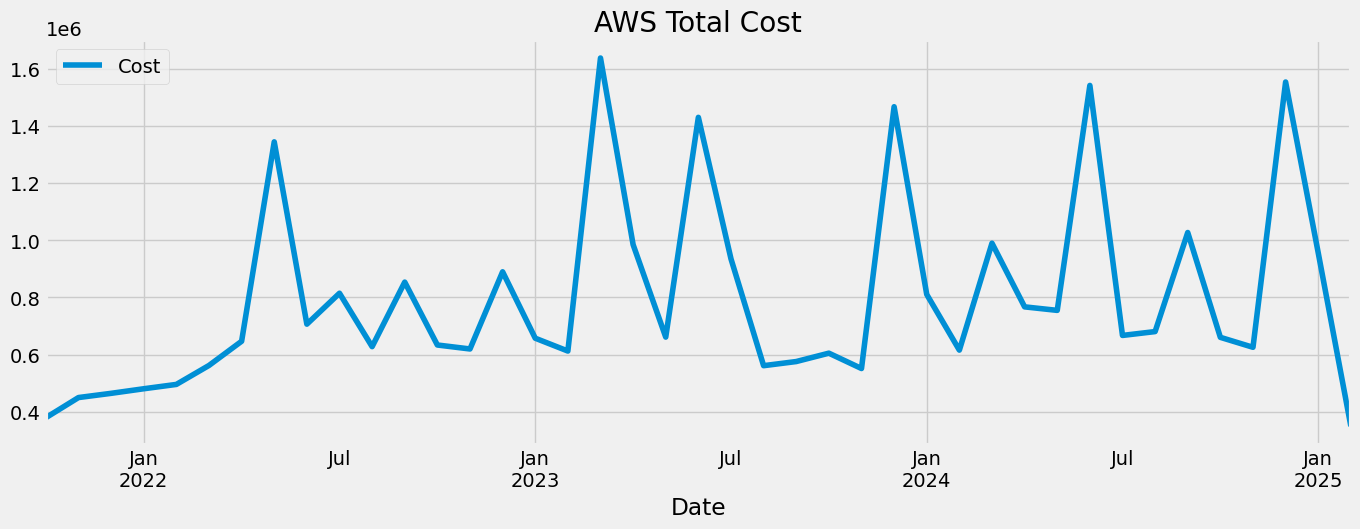

In [8]:
df_ml.plot(style='-', figsize=(15,5), color=color_pal[0], title='AWS Total Cost')

# Train, Split, Test

In [9]:
splite_date = '01-01-2024'### 12 months before the last day of a full month
last_date = '02-01-2025'
train = df_ml.loc[df_ml.index < splite_date]
test = df_ml.loc[(df_ml.index >= splite_date) & (df_ml.index < last_date)]

In [10]:
train.tail()

,Cost
Date,
2023-08-01,5.614320e+05
2023-09-01,5.759178e+05
2023-10-01,6.052033e+05
2023-11-01,5.514994e+05
2023-12-01,1.467499e+06


In [11]:
test.tail()

,Cost
Date,
2024-09-01,1.027315e+06
2024-10-01,6.605933e+05
2024-11-01,6.257406e+05
2024-12-01,1.554002e+06
2025-01-01,9.560546e+05


/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11765/225387108.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


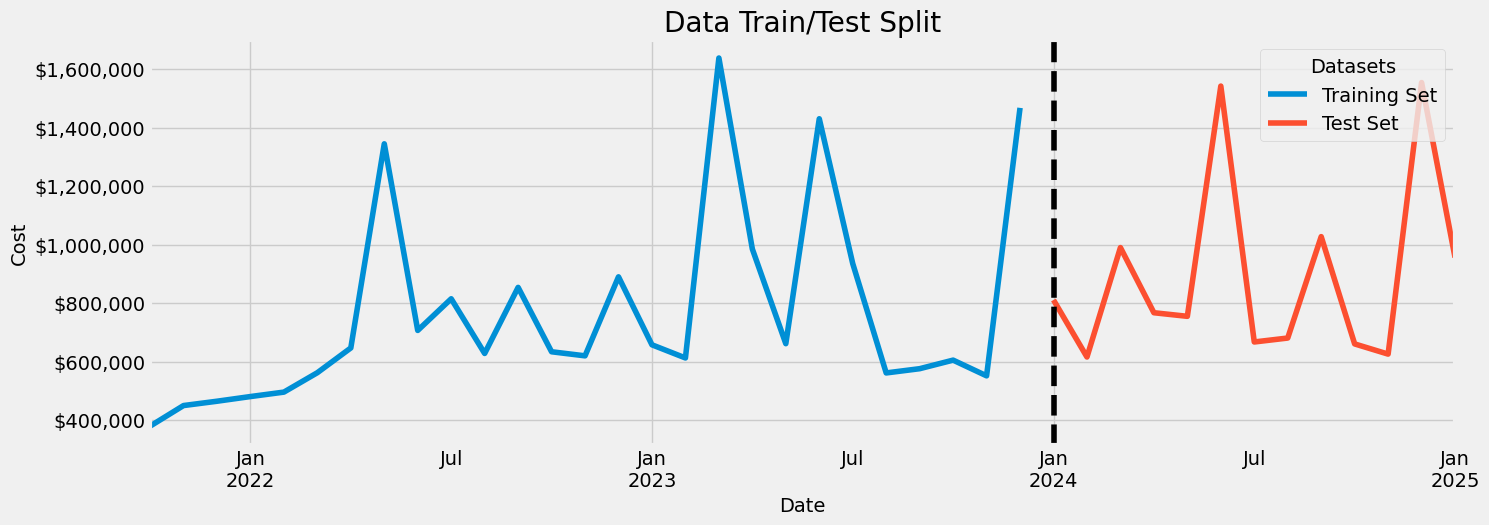

In [12]:
import matplotlib.pyplot as plt
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(15,5))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label = 'Test Set')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.axvline('01-01-2024', color='black', ls='--')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.legend(['Training Set', 'Test Set'], loc='upper right', title='Datasets')

<Axes: xlabel='Date'>

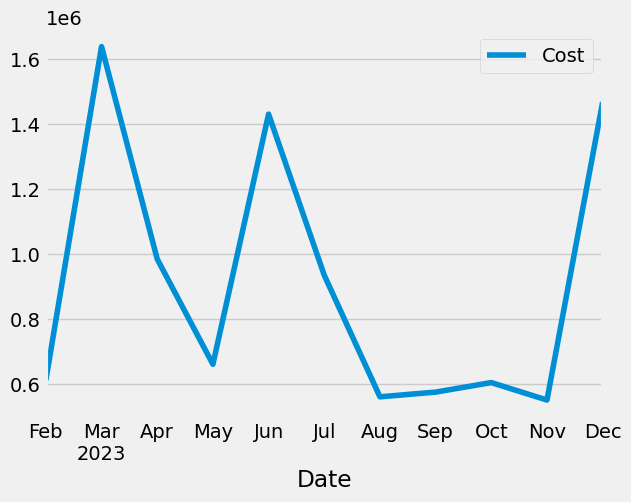

In [13]:
df_ml.loc[(df_ml.index > '01-01-2023') & (df_ml.index < '01-01-2024')].plot()

# Feature Creation 

In [14]:
def create_features(df):
    '''
    Create time series features based on time series index
    '''
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.day_of_week
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['1_month_lag'] = df['Cost'].shift(1)
    df['2_month_lag'] = df['Cost'].shift(2)
    df['3_month_lag'] = df['Cost'].shift(3)
    #df['6_month_lag'] = df['Cost'].shift(6)
    #df['12_month_lag'] = df['Cost'].shift(12)
    #df['24_month_lag'] = df['Cost'].shift(24)
    #df['6_month_mean'] = df['Cost'].rolling(window = 6).mean()
    #df['12_month_mean'] = df['Cost'].rolling(window = 12).mean()
    #df['24_month_mean'] = df['Cost'].rolling(window = 24).mean()
    #df['6_month_std'] = df['Cost'].rolling(window = 6).std()
    #df['12_month_std'] = df['Cost'].rolling(window = 12).std()
    #df['24_month_std'] = df['Cost'].rolling(window = 24).std()
    #df['6_month_max'] = df['Cost'].rolling(window = 6).max()
    #df['12_month_max'] = df['Cost'].rolling(window = 12).max()
    #df['24_month_max'] = df['Cost'].rolling(window = 24).max()
    #df['6_month_min'] = df['Cost'].rolling(window = 6).min()
    #df['12_month_min'] = df['Cost'].rolling(window = 12).min()
    #df['24_month_min'] = df['Cost'].rolling(window = 24).min()
    return df




In [15]:
df_ml = create_features(df_ml)

In [16]:
df_ml.sample(10)

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag
Date,,,,,,,,,
2023-08-01,561431.974079,0,1,8,2023,3,9.351995e+05,1.430313e+06,6.614069e+05
2023-07-01,935199.450999,0,5,7,2023,3,1.430313e+06,6.614069e+05,9.849516e+05
2024-03-01,989912.921616,0,4,3,2024,1,6.158228e+05,8.108048e+05,1.467499e+06
2022-10-01,633772.292340,0,5,10,2022,4,8.538617e+05,6.280091e+05,8.148950e+05
2023-05-01,661406.915024,0,0,5,2023,2,9.849516e+05,1.637978e+06,6.126164e+05
2022-08-01,628009.118636,0,0,8,2022,3,8.148950e+05,7.066702e+05,1.344622e+06
2025-01-01,956054.632754,0,2,1,2025,1,1.554002e+06,6.257406e+05,6.605933e+05
2024-08-01,680725.630970,0,3,8,2024,3,6.672585e+05,1.542014e+06,7.549222e+05
2022-12-01,889948.350916,0,3,12,2022,4,6.198833e+05,6.337723e+05,8.538617e+05


# Visualize our Feature / Target Relationship 

/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11765/3667831974.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


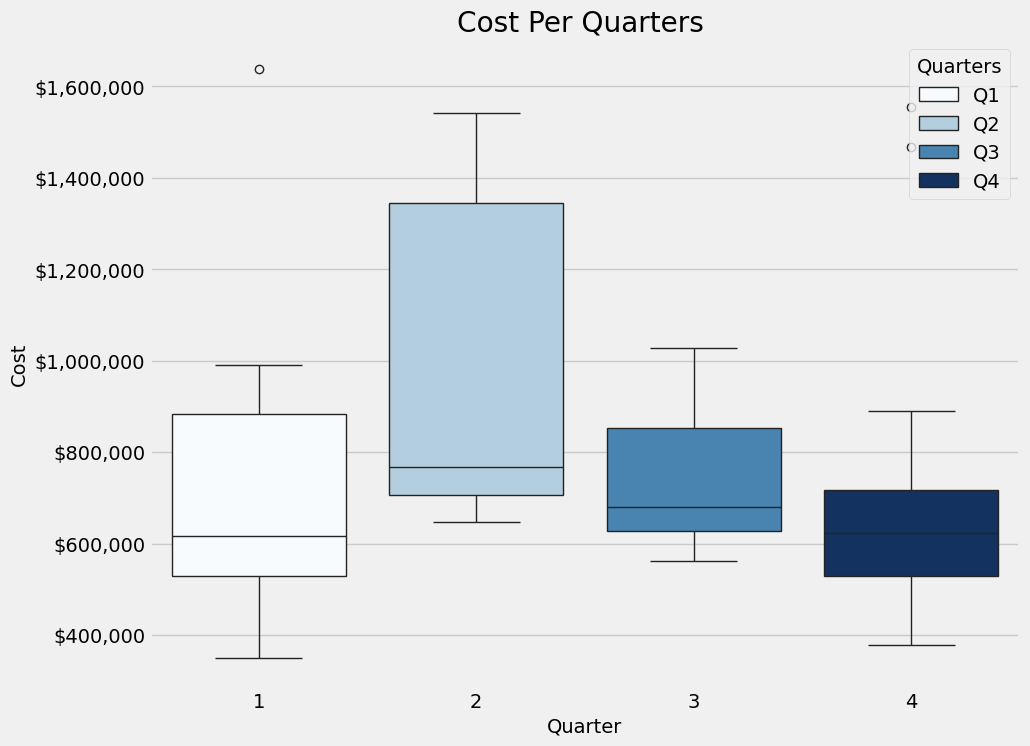

In [17]:
fix, ax = plt.subplots(figsize=(10,8))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
sns.boxplot(data=df_ml, x='quarter', y='Cost', palette='Blues', hue='quarter')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Cost Per Quarters ')
ax.legend(['Q1', 'Q2', 'Q3', 'Q4'], loc='upper right', title='Quarters')
ax.set_xlabel("Quarter", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
plt.show()

# Create our Model

In [18]:
train = create_features(train)
test = create_features(test)


In [19]:
train.columns

Index(['Cost', 'hour', 'day_of_week', 'month', 'year', 'quarter',
       '1_month_lag', '2_month_lag', '3_month_lag'],
      dtype='object')

In [20]:
FEATURES = train.columns[1:]
TARGET = train.columns[0]

In [21]:
FEATURES

Index(['hour', 'day_of_week', 'month', 'year', 'quarter', '1_month_lag',
       '2_month_lag', '3_month_lag'],
      dtype='object')

In [22]:
TARGET

'Cost'

In [23]:
X_train = train[FEATURES]
y_train = train[TARGET]


In [24]:
X_test = test[FEATURES]
y_test = test[TARGET]

In [2]:
# Initialize the XGBoost Regressor with desired parameters
# reg = xgb.XGBRegressor()
'''
reg = XGBRegressor(objective='reg:squarederror',
                        n_estimators=100,
                        learning_rate=0.1,
                        max_depth=3,
                        random_state=42)
'''

"\nreg = XGBRegressor(objective='reg:squarederror',\n                        n_estimators=100,\n                        learning_rate=0.1,\n                        max_depth=3,\n                        random_state=42)\n"

In [786]:
'''
reg = XGBRegressor(objective='reg:squarederror',
                        n_estimators=1000,
                        learning_rate=0.1,
                        max_depth=3,
                        early_stopping_rounds = 50,
                        random_state=42)
'''

"\nreg = XGBRegressor(objective='reg:squarederror',\n                        n_estimators=1000,\n                        learning_rate=0.1,\n                        max_depth=3,\n                        early_stopping_rounds = 50,\n                        random_state=42)\n"

In [25]:
# regresion model
reg = XGBRegressor(n_estimators = 12000,
                   early_stopping_rounds = 40,
                   learning_rate=0.01,
                   max_depth=2,
                   random_state=42
                   )

#reg = xgb.XGBRegressor()

reg.fit(X_train, y_train,
        eval_set = [(X_train,y_train), (X_test, y_test)],
        verbose = 100)




[0]	validation_0-rmse:328798.57176	validation_1-rmse:333952.34650
[100]	validation_0-rmse:253118.59680	validation_1-rmse:298897.91823
[200]	validation_0-rmse:191968.66685	validation_1-rmse:268438.58289
[300]	validation_0-rmse:156868.53660	validation_1-rmse:253140.76856
[400]	validation_0-rmse:131104.59049	validation_1-rmse:232072.08291
[500]	validation_0-rmse:109605.76367	validation_1-rmse:216097.30549
[600]	validation_0-rmse:92974.28590	validation_1-rmse:204476.37669
[700]	validation_0-rmse:78474.62700	validation_1-rmse:203370.52664
[800]	validation_0-rmse:66424.57622	validation_1-rmse:200838.43772
[900]	validation_0-rmse:56227.90107	validation_1-rmse:197410.30942
[1000]	validation_0-rmse:47741.51379	validation_1-rmse:195054.13540
[1100]	validation_0-rmse:40510.43606	validation_1-rmse:193202.27412
[1200]	validation_0-rmse:34489.44945	validation_1-rmse:191227.81685
[1300]	validation_0-rmse:29498.96653	validation_1-rmse:189805.05838
[1400]	validation_0-rmse:25280.92517	validation_1-rmse

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=40,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=12000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Feature Importance

In [26]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_,columns=['importance'])
fi


,importance
hour,0.000000
day_of_week,0.182040
month,0.257263
year,0.026639
quarter,0.000000
1_month_lag,0.082906
2_month_lag,0.303290
3_month_lag,0.147862


<Axes: title={'center': 'Feature Importance'}>

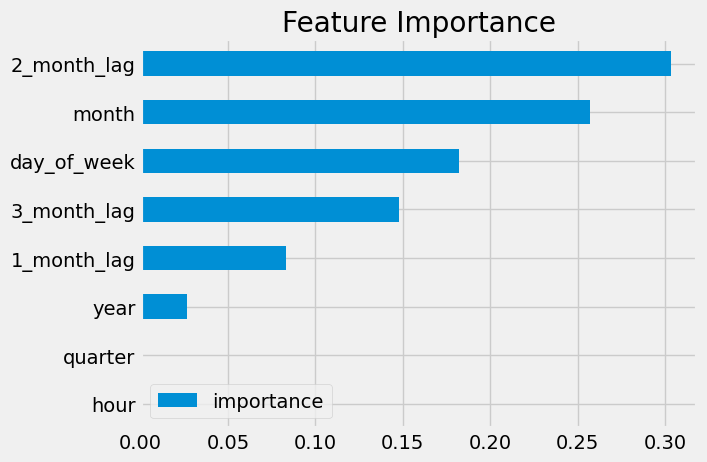

In [27]:
fi.sort_values('importance').plot(kind='barh', title="Feature Importance")

# Forecast on the Test

In [28]:
reg.predict(X_test)

array([ 492166.72,  668380.94, 1162304.  ,  827566.56,  731626.94,
       1303182.2 ,  750031.75,  808911.75,  883763.7 ,  544727.06,
        668727.44, 1204208.5 ,  727342.4 ], dtype=float32)

In [29]:
test['predictions'] = reg.predict(X_test)
test

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,,
2024-01-01,8.108048e+05,0,0,1,2024,1,NaN,NaN,NaN,4.921667e+05
2024-02-01,6.158228e+05,0,3,2,2024,1,8.108048e+05,NaN,NaN,6.683809e+05
2024-03-01,9.899129e+05,0,4,3,2024,1,6.158228e+05,8.108048e+05,NaN,1.162304e+06
2024-04-01,7.672112e+05,0,0,4,2024,2,9.899129e+05,6.158228e+05,8.108048e+05,8.275666e+05
2024-05-01,7.549222e+05,0,2,5,2024,2,7.672112e+05,9.899129e+05,6.158228e+05,7.316269e+05
2024-06-01,1.542014e+06,0,5,6,2024,2,7.549222e+05,7.672112e+05,9.899129e+05,1.303182e+06
2024-07-01,6.672585e+05,0,0,7,2024,3,1.542014e+06,7.549222e+05,7.672112e+05,7.500318e+05
2024-08-01,6.807256e+05,0,3,8,2024,3,6.672585e+05,1.542014e+06,7.549222e+05,8.089118e+05
2024-09-01,1.027315e+06,0,6,9,2024,3,6.807256e+05,6.672585e+05,1.542014e+06,8.837637e+05


In [30]:
df_ml1 = df_ml.merge(test[['predictions']], how='left', left_index=True, right_index=True)
df_ml1

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,,
2021-10-01,3.794357e+05,0,4,10,2021,4,NaN,NaN,NaN,NaN
2021-11-01,4.499119e+05,0,0,11,2021,4,3.794357e+05,NaN,NaN,NaN
2021-12-01,4.646831e+05,0,2,12,2021,4,4.499119e+05,3.794357e+05,NaN,NaN
2022-01-01,4.806844e+05,0,5,1,2022,1,4.646831e+05,4.499119e+05,3.794357e+05,NaN
2022-02-01,4.958688e+05,0,1,2,2022,1,4.806844e+05,4.646831e+05,4.499119e+05,NaN
2022-03-01,5.622309e+05,0,1,3,2022,1,4.958688e+05,4.806844e+05,4.646831e+05,NaN
2022-04-01,6.468500e+05,0,4,4,2022,2,5.622309e+05,4.958688e+05,4.806844e+05,NaN
2022-05-01,1.344622e+06,0,6,5,2022,2,6.468500e+05,5.622309e+05,4.958688e+05,NaN
2022-06-01,7.066702e+05,0,2,6,2022,2,1.344622e+06,6.468500e+05,5.622309e+05,NaN


/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11765/3700352708.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


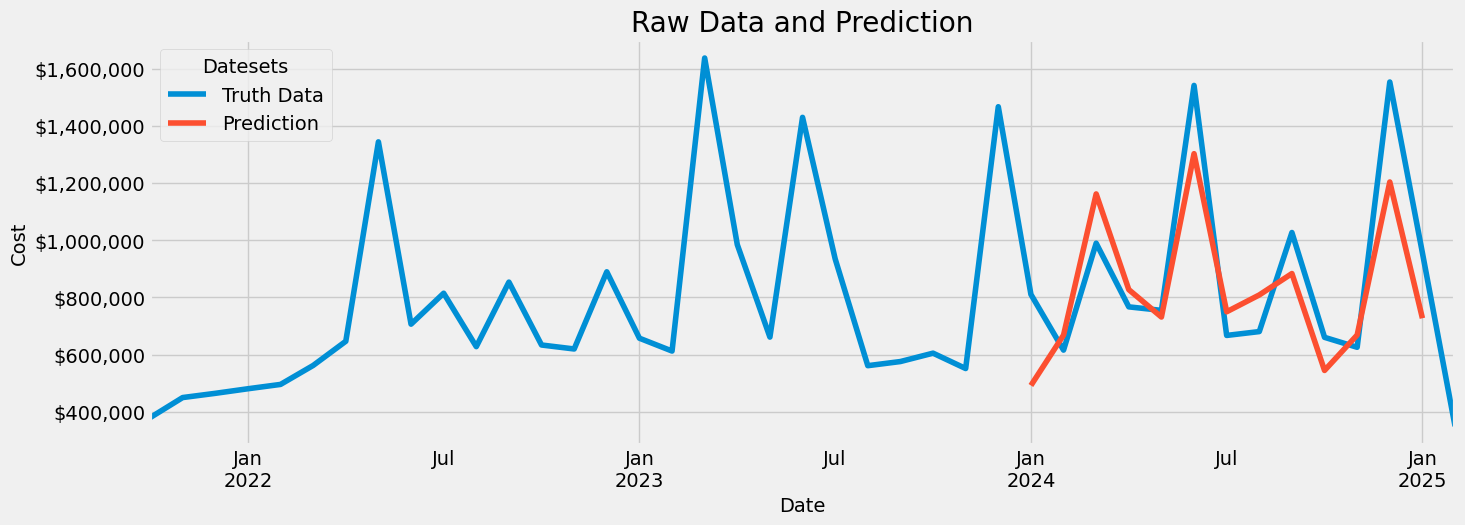

In [31]:
ax = df_ml1[['Cost']].plot(figsize=(15,5))
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
df_ml1['predictions'].plot(ax=ax, style='-')
ax.set_title('Raw Data and Prediction')
ax.legend(['Truth Data', 'Prediction'], loc='upper left', title='Datesets')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
plt.show()

In [33]:
score = np.sqrt(mean_squared_error(test['Cost'], test['predictions']))
print(f'RMSE Score on Test Set: {score:,.2f}')
num = "{:,.2f}".format(score)
print('RMSE Score on Test Set:', num)

RMSE Score on Test Set: 181,672.73
RMSE Score on Test Set: 181,672.73


In [34]:
reg.save_model("AWS_xgboost_model.json")  # Save the Model

# Calculate Error

- look at best and wost predicted months

In [35]:
test['error'] = np.abs(test['Cost'] - test['predictions'])

In [ ]:
# tets['date_index'] = test.index.date

In [36]:
test.groupby('Date')['error'].mean().sort_values(ascending=False).head(5) # Worst 

Date
2024-12-01    349793.435316
2024-01-01    318638.115653
2024-06-01    238831.503067
2025-01-01    228712.257754
2024-03-01    172391.078384
Name: error, dtype: float64

In [38]:
test.groupby('Date')['error'].mean().sort_values(ascending=True).head(5) # Best

Date
2024-05-01    23295.242377
2024-11-01    42986.821968
2024-02-01    52558.129524
2024-04-01    60355.323222
2024-07-01    82773.243662
Name: error, dtype: float64

- Cross Validation 
- Hyper Parameter Tunning 

# Now Let's do Forcast Predictions

In [39]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.load_model("AWS_xgboost_model.json")  # Load trained mode
#model = reg

In [40]:
Cost = df_ml[-12:]['Cost'].values
Cost

array([ 989912.92161552,  767211.23927792,  754922.17987719,
       1542013.75306699,  667258.5063381 ,  680725.63096972,
       1027314.58650558,  660593.27243416,  625740.61553184,
       1554001.93531605,  956054.6327542 ,  349762.80484408])

In [41]:
Date_str = df_ml[-12:].index.values + pd.to_timedelta(52, 'W')
Date_str

array(['2025-02-28T00:00:00.000000000', '2025-03-31T00:00:00.000000000',
       '2025-04-30T00:00:00.000000000', '2025-05-31T00:00:00.000000000',
       '2025-06-30T00:00:00.000000000', '2025-07-31T00:00:00.000000000',
       '2025-08-31T00:00:00.000000000', '2025-09-30T00:00:00.000000000',
       '2025-10-31T00:00:00.000000000', '2025-11-30T00:00:00.000000000',
       '2025-12-31T00:00:00.000000000', '2026-01-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [42]:
data = {'Date_str': Date_str,'Cost' : Cost}
df_now = pd.DataFrame(data)
df_now

,Date_str,Cost
0,2025-02-28,9.899129e+05
1,2025-03-31,7.672112e+05
2,2025-04-30,7.549222e+05
3,2025-05-31,1.542014e+06
4,2025-06-30,6.672585e+05
5,2025-07-31,6.807256e+05
6,2025-08-31,1.027315e+06
7,2025-09-30,6.605933e+05
8,2025-10-31,6.257406e+05
9,2025-11-30,1.554002e+06


In [43]:
df_now['Date'] = pd.to_datetime(df_now['Date_str'])
df_now.set_index('Date')
df_now.index = pd.to_datetime(df_now.index)
df_now = df_now.groupby(by=['Date']).agg({'Cost':sum})

/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11765/2121192341.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_now = df_now.groupby(by=['Date']).agg({'Cost':sum})


In [44]:
df_now

,Cost
Date,
2025-02-28,9.899129e+05
2025-03-31,7.672112e+05
2025-04-30,7.549222e+05
2025-05-31,1.542014e+06
2025-06-30,6.672585e+05
2025-07-31,6.807256e+05
2025-08-31,1.027315e+06
2025-09-30,6.605933e+05
2025-10-31,6.257406e+05


In [45]:
df_now = create_features(df_now)


In [46]:
df_now

,Cost,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag
Date,,,,,,,,,
2025-02-28,9.899129e+05,0,4,2,2025,1,NaN,NaN,NaN
2025-03-31,7.672112e+05,0,0,3,2025,1,9.899129e+05,NaN,NaN
2025-04-30,7.549222e+05,0,2,4,2025,2,7.672112e+05,9.899129e+05,NaN
2025-05-31,1.542014e+06,0,5,5,2025,2,7.549222e+05,7.672112e+05,9.899129e+05
2025-06-30,6.672585e+05,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05
2025-07-31,6.807256e+05,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05
2025-08-31,1.027315e+06,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06
2025-09-30,6.605933e+05,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05
2025-10-31,6.257406e+05,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05


In [47]:
df_now.drop('Cost', axis=1, inplace=True)


In [48]:
reg.predict(df_now)

array([ 528237.25,  676326.2 ,  816503.4 , 1315546.  ,  791536.5 ,
        970561.25,  947104.5 ,  544727.06,  704786.44,  945078.9 ,
        637508.25,  665281.  ], dtype=float32)

In [49]:
df_now['predictions'] = reg.predict(df_now)

In [50]:
df_now

,hour,day_of_week,month,year,quarter,1_month_lag,2_month_lag,3_month_lag,predictions
Date,,,,,,,,,
2025-02-28,0,4,2,2025,1,NaN,NaN,NaN,5.282372e+05
2025-03-31,0,0,3,2025,1,9.899129e+05,NaN,NaN,6.763262e+05
2025-04-30,0,2,4,2025,2,7.672112e+05,9.899129e+05,NaN,8.165034e+05
2025-05-31,0,5,5,2025,2,7.549222e+05,7.672112e+05,9.899129e+05,1.315546e+06
2025-06-30,0,0,6,2025,2,1.542014e+06,7.549222e+05,7.672112e+05,7.915365e+05
2025-07-31,0,3,7,2025,3,6.672585e+05,1.542014e+06,7.549222e+05,9.705612e+05
2025-08-31,0,6,8,2025,3,6.807256e+05,6.672585e+05,1.542014e+06,9.471045e+05
2025-09-30,0,1,9,2025,3,1.027315e+06,6.807256e+05,6.672585e+05,5.447271e+05
2025-10-31,0,4,10,2025,4,6.605933e+05,1.027315e+06,6.807256e+05,7.047864e+05


In [304]:
df_ml['Cost'].values[-13]

615822.8079764604

/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11765/1277721905.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


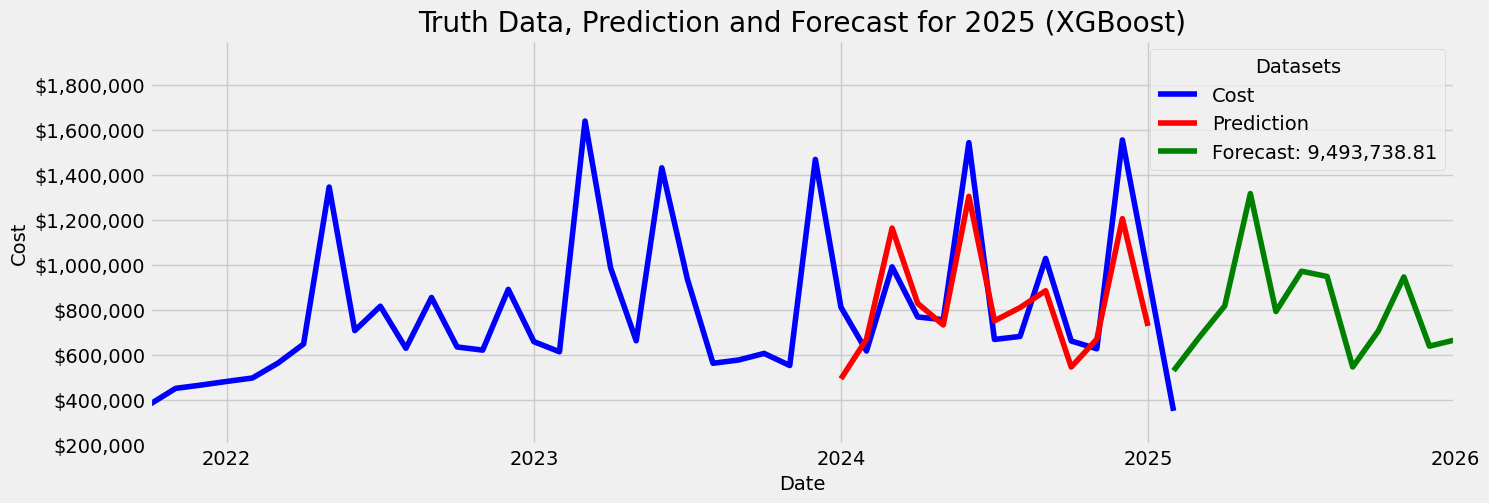

In [335]:
yhat = df_now['predictions'].values
#"{:,.2f}".format(yhat[0:-1].sum()+df_ml['Cost'].values[-13])

fig1, ax = plt.subplots(figsize=(15,5))
df_ml[['Cost']].plot(ax=ax, style='-', label= 'Truth Data', color='blue')
df_ml1['predictions'].plot(ax=ax, style='-', label= 'Prediction', color='red')
df_now['predictions'].plot(ax=ax, style='-', label= 'Forecast: '+str("{:,.2f}".format(yhat[0:-1].sum()+df_ml['Cost'].values[-13])), color='green')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Truth Data, Prediction and Forecast for 2025 (XGBoost)')
ax.legend(loc='upper right', title='Datasets')
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.set_ylim(200000, 2000000)
plt.show()

# Using Prophet

In [145]:
from prophet import Prophet

In [240]:
df_ml_p =combined_df.copy()
df_ml_p['Date_str'] = df_ml_p['Year'].apply(lambda x: str(x)) + "-" + df_ml_p['Month No'].apply(lambda x: str(x)) + "-01"
df_ml_p['ds'] = pd.to_datetime(df_ml_p['Date_str'])
#df_ml_p.set_index('ds')
#df_ml_p.index = pd.to_datetime(df_ml_p.index)
df_ml_p = df_ml_p.groupby(['ds']).agg(y=('Cost','sum'))

In [241]:
df_ml_p

,y
ds,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [243]:
df_p = pd.DataFrame()


In [244]:
df_p['ds'] = df_ml_p.index
df_p['y'] = df_ml_p['y'].values


In [236]:
# df_p = df_p.iloc[1:-1,:]
df_p

,ds,y
1,2021-11-01,4.499119e+05
2,2021-12-01,4.646831e+05
3,2022-01-01,4.806844e+05
4,2022-02-01,4.958688e+05
5,2022-03-01,5.622309e+05
6,2022-04-01,6.468500e+05
7,2022-05-01,1.344622e+06
8,2022-06-01,7.066702e+05
9,2022-07-01,8.148950e+05
10,2022-08-01,6.280091e+05


In [245]:
model = Prophet()
model.fit(df_p)

08:48:12 - cmdstanpy - INFO - Chain [1] start processing
08:48:12 - cmdstanpy - INFO - Chain [1] done processing


In [246]:
# Python
future = model.make_future_dataframe(periods=12, freq='M')   # Create a future DataFrame for 12 months
forecast = model.predict(future)                             # Generate the forecast
future.tail()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
48,2025-09-30
49,2025-10-31
50,2025-11-30
51,2025-12-31
52,2026-01-31


In [333]:
#forecast[['yhat', 'yhat_lower', 'yhat_upper']].sum()
#forecast[['yhat', 'yhat_lower', 'yhat_upper']]
yhat = forecast.iloc[-12:,:]['yhat_lower'].values
#ax.legend(title="Total Cost $"+str("{:,.2f}".format(t)))
"{:,.2f}".format(yhat[0:-1].sum())




'8,558,699.24'

/var/folders/6n/h1bqj3sx5wbdcpvdck2xngj80000gn/T/ipykernel_11765/51865139.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])


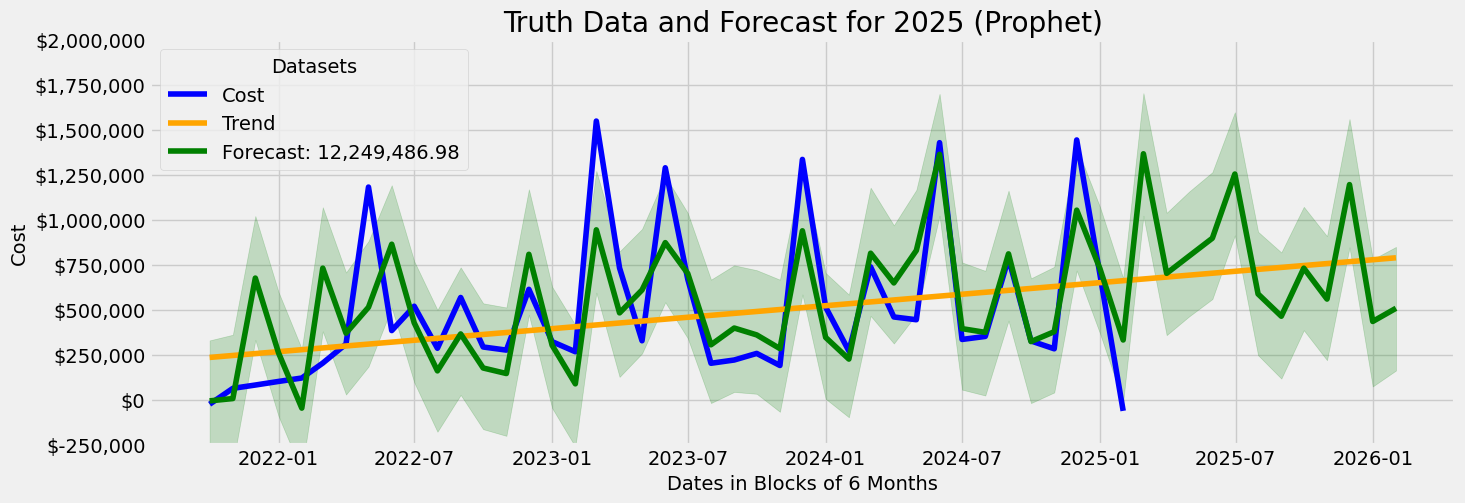

In [334]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

yhat = forecast.iloc[-13:,:]['yhat'].values
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df_p['ds'], df_p['y'], label='Cost',color='blue')
plt.plot(forecast['ds'], forecast['trend'], label='Trend',color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast: '+str("{:,.2f}".format(yhat[0:-1].sum())),color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2)
#plt.plot(forecast['ds'], forecast['yhat_lower'], label='Forecast',color='green', linestyle='--')
#plt.plot(forecast['ds'], forecast['yhat_upper'], label='Forecast',color='green', linestyle='--')
#model.plot(forecast, ax=ax)       # Plot the forecast
#plot(model, forecast)               # Plot the forecast
#plot_components(model, forecast)    # Plot the forecast components
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,}'.format(int(val)) for val in current_values])
ax.set_title('Truth Data and Forecast for 2025 (Prophet)')
#ax.legend(['Truth Data', 'Prediction','Forecast'], loc='upper left', title='Datesets')
ax.legend(loc='upper left', title='Datasets')
ax.set_xlabel("Dates in Blocks of 6 Months", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.set_ylim(200000, 2000000)
plt.show()

In [174]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          53 non-null     datetime64[ns]
 1   trend                       53 non-null     float64       
 2   yhat_lower                  53 non-null     float64       
 3   yhat_upper                  53 non-null     float64       
 4   trend_lower                 53 non-null     float64       
 5   trend_upper                 53 non-null     float64       
 6   additive_terms              53 non-null     float64       
 7   additive_terms_lower        53 non-null     float64       
 8   additive_terms_upper        53 non-null     float64       
 9   yearly                      53 non-null     float64       
 10  yearly_lower                53 non-null     float64       
 11  yearly_upper                53 non-null     float64       
 

In [212]:
forecast['ds'].dt.month_name()
forecast['ds'].dt.year
forecast['ds'].dt.month


0     10
1     11
2     12
3      1
4      2
5      3
6      4
7      5
8      6
9      7
10     8
11     9
12    10
13    11
14    12
15     1
16     2
17     3
18     4
19     5
20     6
21     7
22     8
23     9
24    10
25    11
26    12
27     1
28     2
29     3
30     4
31     5
32     6
33     7
34     8
35     9
36    10
37    11
38    12
39     1
40     2
41     2
42     3
43     4
44     5
45     6
46     7
47     8
48     9
49    10
50    11
51    12
52     1
Name: ds, dtype: int32

In [132]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
48,2025-09-30,9.840696e+05,6.948866e+05,1.238027e+06
49,2025-10-31,8.466224e+05,5.629652e+05,1.122210e+06
50,2025-11-30,1.355549e+06,1.063125e+06,1.627252e+06
51,2025-12-31,7.472143e+05,4.887295e+05,1.006662e+06
52,2026-01-31,8.058882e+05,5.462593e+05,1.090604e+06


In [133]:
forecast.describe().T

,count,mean,min,25%,50%,75%,max,std
ds,53,2023-12-01 01:48:40.754716928,2021-10-01 00:00:00,2022-11-01 00:00:00,2023-12-01 00:00:00,2025-01-01 00:00:00,2026-01-31 00:00:00,NaN
trend,53.0,808665.555572,587349.328128,698136.794261,808644.465505,919711.627188,1030219.256458,131464.944504
yhat_lower,53.0,573958.14036,90662.066392,390994.194735,523251.693319,763208.096246,1217130.350613,270513.97971
yhat_upper,53.0,1123411.778515,626415.982566,934566.245367,1090092.910808,1317981.585203,1772142.938225,274081.116475
trend_lower,53.0,808665.553451,587349.328128,698136.794261,808644.465505,919711.627188,1030219.235688,131464.941298
trend_upper,53.0,808665.557583,587349.328128,698136.794261,808644.465505,919711.627188,1030219.276472,131464.947549
additive_terms,53.0,41362.883785,-274332.19228,-173672.104451,10671.99859,211580.474548,630304.70641,244147.555622
additive_terms_lower,53.0,41362.883785,-274332.19228,-173672.104451,10671.99859,211580.474548,630304.70641,244147.555622
additive_terms_upper,53.0,41362.883785,-274332.19228,-173672.104451,10671.99859,211580.474548,630304.70641,244147.555622
yearly,53.0,41362.883785,-274332.19228,-173672.104451,10671.99859,211580.474548,630304.70641,244147.555622


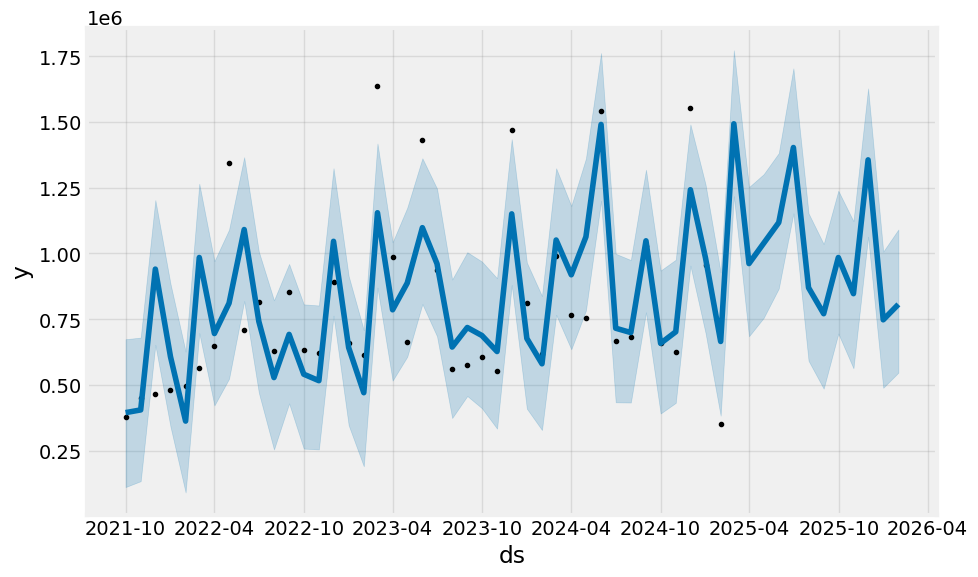

In [134]:
# Python
fig1 = model.plot(forecast)

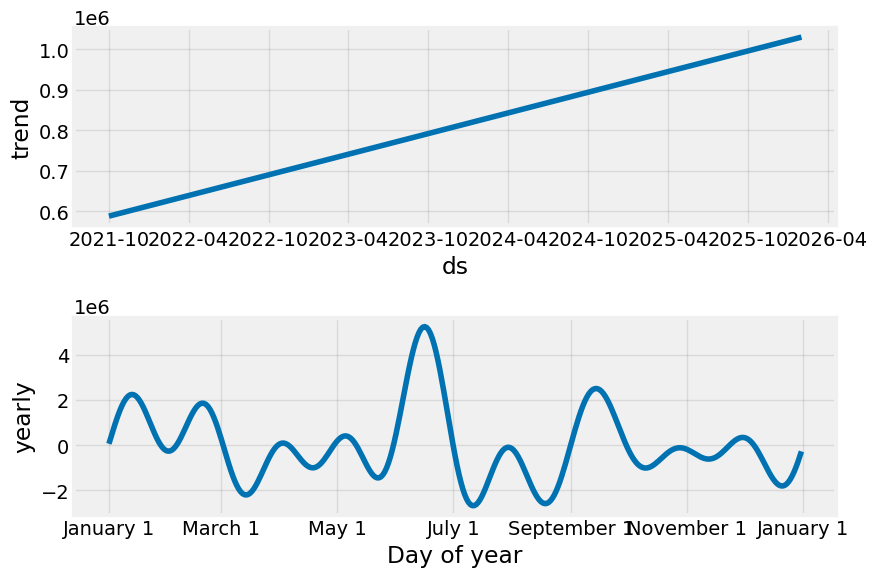

In [135]:
# Python
fig2 = model.plot_components(forecast)

# Using Deep Learning RNN

https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [92]:
df_dl =combined_df.copy()
df_dl['Date_str'] = df_dl['Year'].apply(lambda x: str(x)) + "-" + df_dl['Month No'].apply(lambda x: str(x)) + "-01"
df_dl['Date'] = pd.to_datetime(df_dl['Date_str'])
#df_dl.set_index('Date')
#df_dl.index = pd.to_datetime(df_dl.index)
df_dl = df_dl.groupby(by=['Date']).agg(Cost=('Cost','sum'))

In [93]:
df_dl

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [94]:
dataset_temp = df_dl[['Cost']]

In [95]:
dataset_temp

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


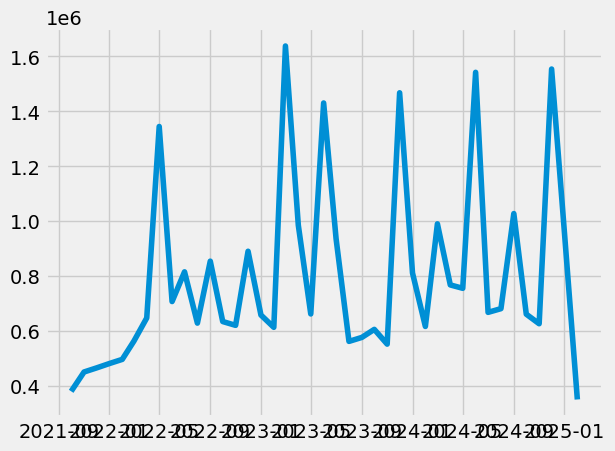

In [96]:
plt.plot(dataset_temp)
plt.show()

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:

# load the dataset
# dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe = dataset_temp.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')

In [99]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

27 14


In [100]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [109]:

# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [110]:

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
12/12 - 0s - 28ms/step - loss: 1049581125632.0000
Epoch 2/200
12/12 - 0s - 2ms/step - loss: 974590509056.0000
Epoch 3/200
12/12 - 0s - 1ms/step - loss: 912007626752.0000
Epoch 4/200
12/12 - 0s - 1ms/step - loss: 847796568064.0000
Epoch 5/200
12/12 - 0s - 1ms/step - loss: 797833101312.0000
Epoch 6/200
12/12 - 0s - 1ms/step - loss: 748035506176.0000
Epoch 7/200
12/12 - 0s - 1ms/step - loss: 698657800192.0000
Epoch 8/200
12/12 - 0s - 1ms/step - loss: 656173891584.0000
Epoch 9/200
12/12 - 0s - 1ms/step - loss: 612665917440.0000
Epoch 10/200
12/12 - 0s - 1ms/step - loss: 572009676800.0000
Epoch 11/200
12/12 - 0s - 902us/step - loss: 534580920320.0000
Epoch 12/200
12/12 - 0s - 1ms/step - loss: 497837637632.0000
Epoch 13/200
12/12 - 0s - 960us/step - loss: 462801076224.0000
Epoch 14/200
12/12 - 0s - 1ms/step - loss: 431452979200.0000
Epoch 15/200
12/12 - 0s - 1ms/step - loss: 399334473728.0000
Epoch 16/200
12/12 - 0s - 1ms/step - loss: 369516740608.0000
Epoch 17/200
12/12 - 0s - 9

In [111]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 122321166336.00 MSE (349744.43 RMSE)
Test Score: 190304976896.00 MSE (436239.59 RMSE)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


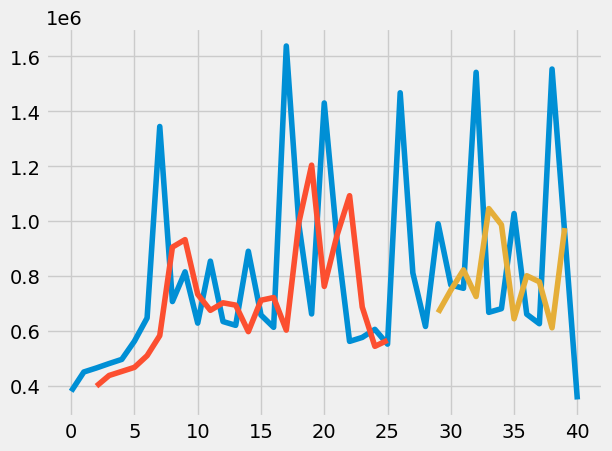

In [112]:
...
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/400
12/12 - 0s - 38ms/step - loss: 526040170496.0000
Epoch 2/400
12/12 - 0s - 1ms/step - loss: 489825763328.0000
Epoch 3/400
12/12 - 0s - 2ms/step - loss: 452050780160.0000
Epoch 4/400
12/12 - 0s - 1ms/step - loss: 414629888000.0000
Epoch 5/400
12/12 - 0s - 1ms/step - loss: 375282532352.0000
Epoch 6/400
12/12 - 0s - 1ms/step - loss: 337785815040.0000
Epoch 7/400
12/12 - 0s - 1ms/step - loss: 296300871680.0000
Epoch 8/400
12/12 - 0s - 976us/step - loss: 248333303808.0000
Epoch 9/400
12/12 - 0s - 1ms/step - loss: 204603326464.0000
Epoch 10/400
12/12 - 0s - 1ms/step - loss: 161354514432.0000
Epoch 11/400
12/12 - 0s - 1ms/step - loss: 134789808128.0000
Epoch 12/400
12/12 - 0s - 935us/step - loss: 118076506112.0000
Epoch 13/400
12/12 - 0s - 1ms/step - loss: 107734540288.0000
Epoch 14/400
12/12 - 0s - 999us/step - loss: 105101164544.0000
Epoch 15/400
12/12 - 0s - 1ms/step - loss: 102315212800.0000
Epoch 16/400
12/12 - 0s - 921us/step - loss: 102729424896.0000
Epoch 17/400
12/12 - 0s 

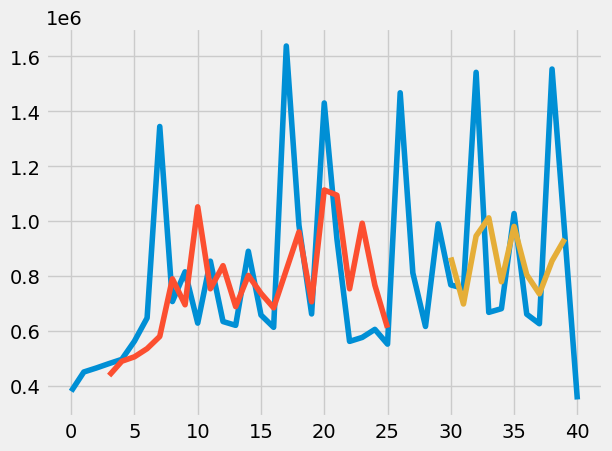

In [143]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# load the dataset
#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe = dataset_temp.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_shape=(look_back,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Using ARIMA and LSTM

https://neptune.ai/blog/arima-vs-prophet-vs-lstm

In [8]:
df_arima =combined_df.copy()
df_arima['Date_str'] = df_arima['Year'].apply(lambda x: str(x)) + "-" + df_arima['Month No'].apply(lambda x: str(x)) + "-01"
df_arima['Date'] = pd.to_datetime(df_arima['Date_str'])
#df_dl.set_index('Date')
#df_dl.index = pd.to_datetime(df_dl.index)
#df_arima = df_arima.groupby(by=['Date']).agg(Cost=('Cost','sum'))

In [9]:
df_arima

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No,Date_str,Date
0,0,OCT,2022,Entercom Communications,724972922289,AWS Backup,2.869190e+00,NaN,10,2022-10-01,2022-10-01
1,1,OCT,2022,Entercom Communications,724972922289,AWS Backup,1.240000e-08,NaN,10,2022-10-01,2022-10-01
2,2,OCT,2022,Entercom Communications,724972922289,AWS Backup,4.910088e+02,NaN,10,2022-10-01,2022-10-01
3,3,OCT,2022,Entercom Communications,724972922289,AWS Certificate Manager,1.514896e+03,NaN,10,2022-10-01,2022-10-01
4,4,OCT,2022,Entercom Communications,724972922289,AWS Certificate Manager,3.620000e+02,NaN,10,2022-10-01,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...
8889,217,SEP,2022,Entercom Communications,724972922289,Savings Plans for AWS Compute usage,2.932200e+04,NaN,9,2022-9-01,2022-09-01
8890,218,SEP,2022,Entercom Communications,724972922289,Tax,1.951293e+04,NaN,9,2022-9-01,2022-09-01
8891,219,SEP,2022,Entercom Communications,724972922289,Training Certification Vouchers - backup,2.400000e+03,NaN,9,2022-9-01,2022-09-01
8892,220,SEP,2022,Entercom Communications,724972922289,Training Certification Vouchers - backup2,1.500000e+02,NaN,9,2022-9-01,2022-09-01


In [14]:
import numpy as np

lag_features = ["Cost"]
df_rolled_7d = df_arima[lag_features].rolling(window=7, min_periods=0)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d.columns = ["Date", "Cost"]

# finding new services in 2024

In [120]:
services_df = total_per_service_df[total_per_service_df['Total'] > 10]
x = services_df.sort_values(by=['Service','Year'])
x = x.reset_index()


In [121]:

total = 0
for index, row in x.iterrows():
    #print(row['Year'], row['Service'], row['Total'], index)
    #print(x.iloc[index,0])
    if row['Year'] == 2025:
        if index > 0 :
            #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
            #print(" * ",row['Year'], row['Service'], row['Total'], index)
            #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
            if x.iloc[index-1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)
                total = total + row['Total']
        else:
            if x.iloc[index+1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)  
                total = total + row['Total']        
print("Total $ in New Services ",total)



 *  2025 AWS Backup 177.0471520664 4
 *  2025 AWS Certificate Manager 1456.0 9
 *  2025 AWS CloudTrail 4267.7932087043 14
 *  2025 AWS Config 5597.39271 19
 *  2025 AWS Cost Explorer 40.7862 23
 *  2025 AWS Database Migration Service 2741.6741690379 30
 *  2025 AWS Directory Service 494.12366115 35
 *  2025 AWS Elemental MediaLive 27.0816 40
 *  2025 AWS Global Accelerator 33.8570972152 47
 *  2025 AWS Glue 14.4360912696 51
 *  2025 AWS Key Management Service 328.820238538 56
 *  2025 AWS Lambda 4082.2132638381 61
 *  2025 AWS Secrets Manager 212.0174806031 69
 *  2025 AWS Security Hub 710.1294109 74
 *  2025 AWS Support (Enterprise) 49246.7885 79
 *  2025 AWS Transfer Family 203.8023883235 84
 *  2025 AWS WAF 1581.0202725838 89
 *  2025 AWS X-Ray 47.56615955 94
 *  2025 Amazon API Gateway 97.2144196157 99
 *  2025 Amazon CloudFront 23456.071145917 106
 *  2025 Amazon Cognito 91.25025 111
 *  2025 Amazon Detective 307.2288293262 116
 *  2025 Amazon DocumentDB (with MongoDB compatibilit